# Проект по Python for Data Analysis

Датасет состоит из данных сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.
По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

In [1]:
!pip install phik

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from phik import resources, statistics
from phik.report import plot_correlation_matrix

In [4]:
df = pd.read_csv('real_estate_data.csv', encoding='utf-8', sep='\t')

## Этап 1. Предварительная обработка

### Общий обзор данных

In [5]:
pd.set_option('display.max_columns',50)
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<div class="alert alert-info">  я здесь исправила на пять первых хначений по прредыдущему опыту

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [7]:
#Вывод количества пропущенных значений в каждом столбце
null_value_in_column = df.isnull().sum()
for i, (column, null_count) in enumerate(null_value_in_column.sort_values(ascending=False).items(), start=1):
    if null_count > 0:
        percent = round(null_count * 100 / len(df), 1)
        print(f"{i}. {column}: пропусков {null_count} ({percent}%)")

1. is_apartment: пропусков 20924 (88.3%)
2. parks_nearest: пропусков 15620 (65.9%)
3. ponds_nearest: пропусков 14589 (61.6%)
4. balcony: пропусков 11519 (48.6%)
5. ceiling_height: пропусков 9195 (38.8%)
6. airports_nearest: пропусков 5542 (23.4%)
7. cityCenters_nearest: пропусков 5519 (23.3%)
8. parks_around3000: пропусков 5518 (23.3%)
9. ponds_around3000: пропусков 5518 (23.3%)
10. days_exposition: пропусков 3181 (13.4%)
11. kitchen_area: пропусков 2278 (9.6%)
12. living_area: пропусков 1903 (8.0%)
13. floors_total: пропусков 86 (0.4%)
14. locality_name: пропусков 49 (0.2%)


In [8]:
def print_null_values_table(df):
    null_value_in_column = df.isnull().sum()

    null_data = [
        [column, null_count, f"{round(null_count * 100 / len(df), 1)}%"]
        for column, null_count in null_value_in_column.items()
        if null_count > 0
    ]
    if null_data:
        null_df = pd.DataFrame(null_data, columns=["column", "missing_values", "percentage"])
        
        print(null_df.to_string(index=True))  # Используем index=True, чтобы колонки были правильно подписаны
    else:
        print("Нет пропущенных значений в данных.")

print_null_values_table(df)

                 column  missing_values percentage
0        ceiling_height            9195      38.8%
1          floors_total              86       0.4%
2           living_area            1903       8.0%
3          is_apartment           20924      88.3%
4          kitchen_area            2278       9.6%
5               balcony           11519      48.6%
6         locality_name              49       0.2%
7      airports_nearest            5542      23.4%
8   cityCenters_nearest            5519      23.3%
9      parks_around3000            5518      23.3%
10        parks_nearest           15620      65.9%
11     ponds_around3000            5518      23.3%
12        ponds_nearest           14589      61.6%
13      days_exposition            3181      13.4%


In [9]:
#проверка на дубликаты
print(f'Количество строк дубликатов: {df.duplicated().sum()}') 

Количество строк дубликатов: 0


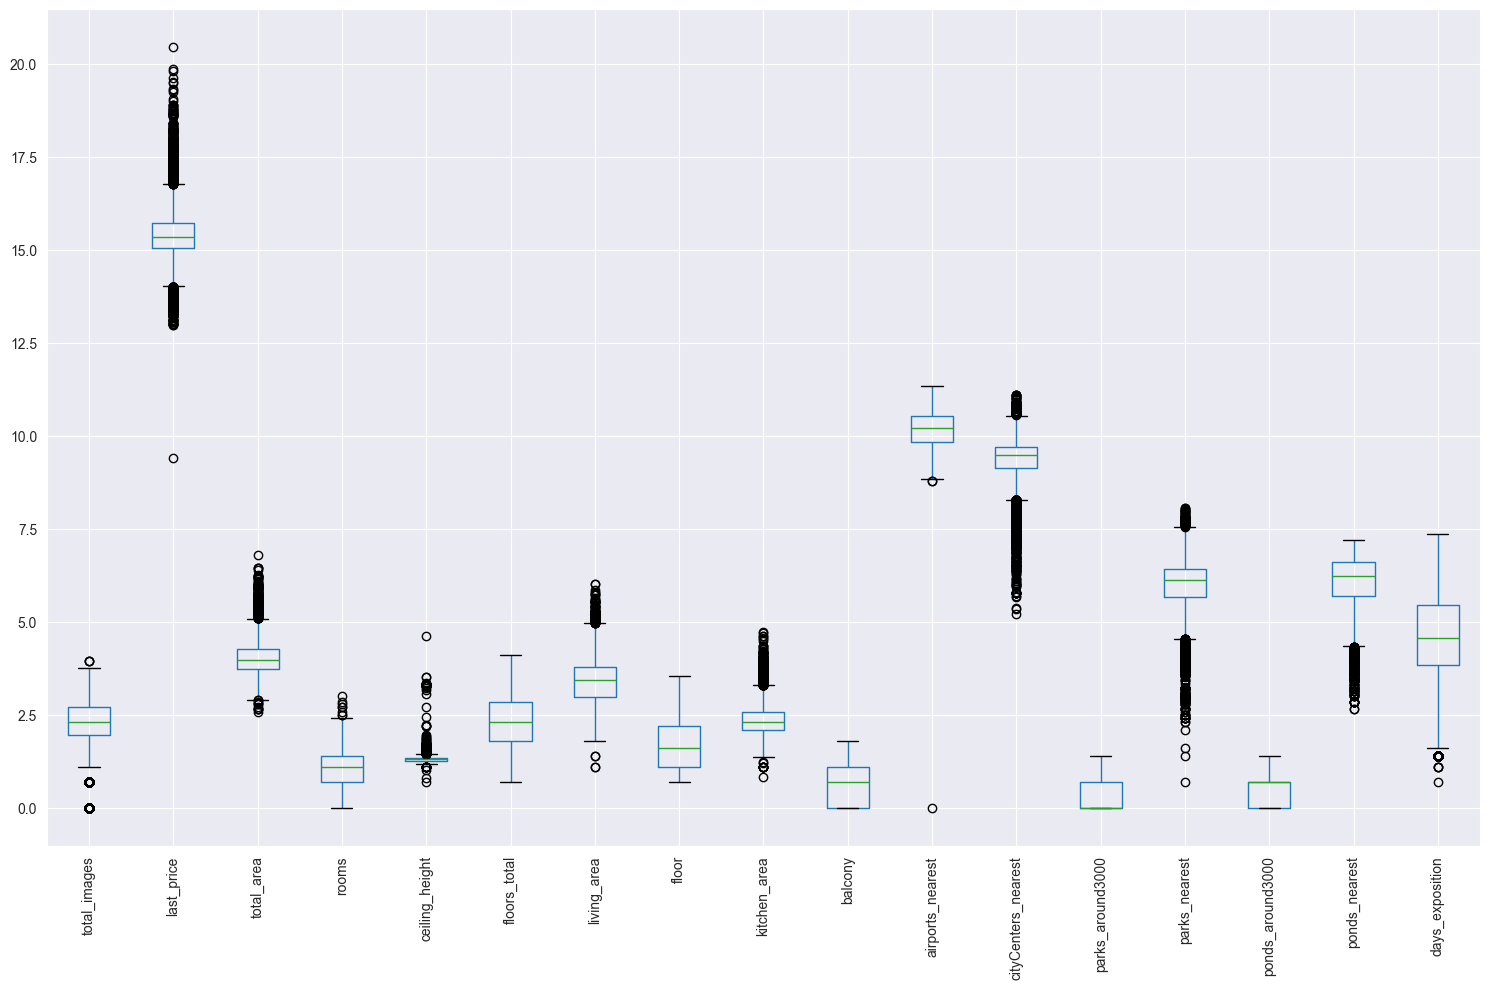

In [10]:
#C помощью boxplot проверим числовые данные на выбросы
num_df = df.select_dtypes(include=['number'])
log_df = num_df.apply(lambda col: np.log(col + 1) if col.min() >= 0 else col)

plt.figure(figsize=(15, 10))
log_df.boxplot()

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [11]:
# Подсчет количества выбросов
num_df = df.select_dtypes(include=['number'])
log_df = num_df.apply(lambda col: np.log(col + 1) if col.min() >= 0 else col)

def count_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((series < lower_bound) | (series > upper_bound)).sum()

outlier_counts = log_df.apply(count_outliers)
total_counts = log_df.count()
outlier_percentages = (outlier_counts / total_counts * 100).round(2)

outlier_info = pd.DataFrame({
    'Количество выбросов': outlier_counts,
    'Процент выбросов': outlier_percentages
})

print(outlier_info)


                     Количество выбросов  Процент выбросов
total_images                        1934              8.16
last_price                          1178              4.97
total_area                           463              1.95
rooms                                  8              0.03
ceiling_height                       775              5.34
floors_total                           0              0.00
living_area                          151              0.69
floor                                  0              0.00
kitchen_area                         541              2.53
balcony                                0              0.00
airports_nearest                       3              0.02
cityCenters_nearest                 1449              7.97
parks_around3000                       0              0.00
parks_nearest                        514              6.36
ponds_around3000                       0              0.00
ponds_nearest                        314              3.

<div class="alert alert-info">  я  добавила подсчет процентов выбросов, так как мксим сказал, что менее 5 процентов можно чпокойно удалить. у нас здесь есть выбивающиеся значения, но они не так чтобы очень критичны для нашего исследования, поэтому, думаю можем поудалять по усам, а там гдк фото и расстояние до цента - это можжно оставить просто , не думаю, что это на что-то повляет

In [12]:
#Функция для удаления выбросов, которые оказались за пределами трех межквартильных отклонений
def remove_outliers(column_name):
    global df
    # Вычисление IQR
    qi = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - qi

    # Границы для усов
    lower_bound = qi - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Фильтрация данных
    df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

    # Построение боксплота для обновленных данных
    plt.boxplot(df[column_name])
    plt.show()

In [13]:
#Сохраним размер df для сравнения после обработки
len_df_start = len(df)

### Детальный обзор каждого параметра

При анализе параметров выполнены следующие шаги:

    1. Обзор уникальных значений для визуальной оценки корректности данных. 
    2. Анализ пропусков и замена при возможности.
    3. Удаление выбросов, методом трех межквартильных отклонений или 99% персентилем.
    4. Форматирование значений или замена типа данных при необходимости.

Результаты обработки по каждому параметру:
1. total_images - удалены выбросы методом трех межквартильных отклонений.
2. last_price - удалены строки с редкими значениями (99% персентиль), значения округлены до целого числа.
3. total_area - удалены выбросы методом трех межквартильных отклонений.
4. first_day_exposition - удалена временная метка, осталась только дата.
5. rooms - значение 0 заменено на 1, удалены выбросы методом трех межквартильных отклонений.
6. ceiling_height - пропущенные значения заменены на среднее значение, удалены выбросы методом трех межквартильных отклонений.
7. floors_total - приведен к типу int, удалены все строки с пропусками, удалены строки с редкими значениями (99% персентиль).
8. living_area - пропуски заменены на среднее значение этого параметра с той же общей площадью, удалены выбросы методом трех межквартильных отклонений, округение до 2-знаков после запятой.
9. floor - удалены выбросы методом трех межквартильных отклонений.
10. is_apartment - пропуски заменены на значениe False (т.е. квартира).
11. studio - без изменений.
12. open_plan - без изменений.
13. balcony - заменены пропущенные значения на 0 (нет балкона), приведен к типу int, удалены выбросы методом трех межквартильных отклонений.
14. kitchen_area - пропуски заменены на среднюю долю кухни от нежилой зоны по всем строкам, удалены выбросы методом трех межквартильных отклонений.
15. airports_nearest - без измнений, в том числе оставлены пропуски.
16. cityCenters_nearest - без измнений, в том числе оставлены пропуски.
17. days_exposition -  заменены пропущенные значения на 0, приведен к типу int, удалены выбросы методом трех межквартильных отклонений.
18. locality_name - заменены дубликаты названий, пропуски оставлены.
19. parks_nearest - сделаны замены пропусков на 3100 в тех строках, где известно, что в радиусе 3 км нет парка, остались пропуски.
20. ponds_nearest - сделаны замены пропусков на 3100 в тех строках, где известно, что в радиусе 3 км нет водоема, остались пропуски.
21. parks_around3000 - без изменений, остались пропуски.
22. ponds_around3000 - без изменений, остались пропуски.

Обоснование выбора способа удаления выбросов:
Для параметров last_price, floors_total выбран 99% персентиль, чтобы удалить экстремальные редкие значения, но в целом, длинный хвост для этих значений уместен.
Для других параметров был выбран методо трех межквартильных отклонений, так как необходимо убрать некорректные как миинимальные значения и так и максимальльные значения (например, потолки 1 метр или площадь кухни 600 м. кв).

#### total_images

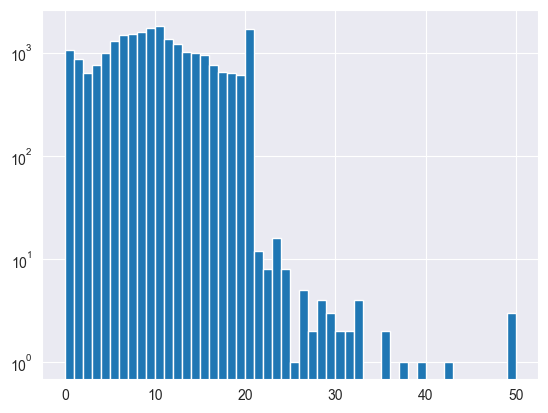

In [14]:
df['total_images'].hist(bins=50, log=True)
plt.show()

In [15]:
# просмотр уникальных значений
df['total_images'].sort_values(ascending=False)
df['total_images'].value_counts()

total_images
10    1798
9     1725
20    1694
8     1585
7     1521
6     1482
11    1362
5     1301
12    1225
0     1059
13    1015
14     986
4      986
15     948
1      872
3      769
16     761
17     650
18     642
2      640
19     603
23      16
21      12
24       8
22       8
26       5
32       4
28       4
29       3
50       3
35       2
31       2
27       2
30       2
25       1
39       1
42       1
37       1
Name: count, dtype: int64

<div class="alert alert-info"> Давай здесь все-таки по персентилю удалим, а то слишком много теряеv много стоок в случае усов

In [16]:
#Уберем выбросы  по процентилю, чтобы не потерять данные
threshold_photos = df['total_images'].quantile(0.99)
df = df[df.total_images <= threshold_photos]

#### last_price

In [17]:
#Просмотрим уникальные значения
df['last_price'].unique()

array([13000000.,  3350000.,  5196000., ...,  6151120., 21400000.,
       11475000.])

<div class="alert alert-info"> я думаю юник здесь нет смысла использовать, на мэто ничего показывает в данном слусае

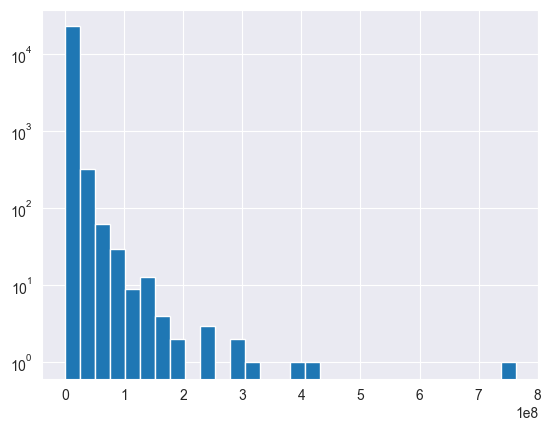

In [18]:
#Поиск аномалий
df['last_price'].hist(bins=30, log=True)
plt.show()

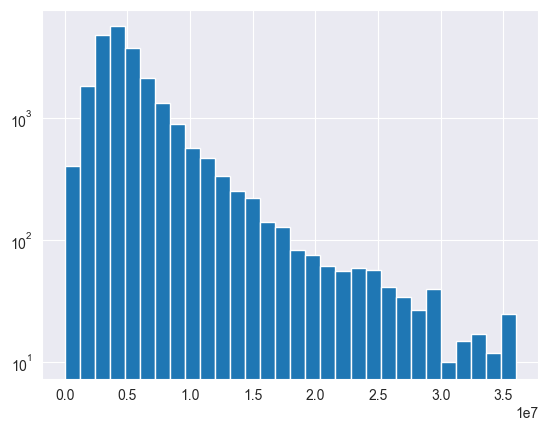

In [19]:
#Уберем 1% аномальных значений. Воспользуемся 99% персентилем
threshold = df['last_price'].quantile(0.99)
df = df[df.last_price <= threshold]

# Визуализируем
df['last_price'].hist(bins=30, log=True)
plt.show()

In [20]:
# Округление до целого
df['last_price'] = df['last_price'].round(0)

#### total_area

In [21]:
#Уникальные значения
df['total_area'].unique()

array([108.  ,  40.4 ,  56.  , ...,  66.86, 133.81,  76.75])

<div class="alert alert-info"> тоже не вижу смвсла в унике, ничего не показывет нам, тут ыезде лучше строить распределние и ящтк с усами, толку будет больше

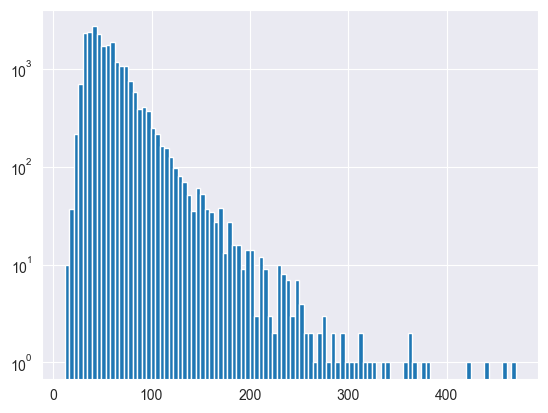

In [22]:
df['total_area'].hist(bins=100, log=True)
plt.show()

In [23]:
print(df['total_area'].max())

470.3


<div class="alert alert-info"> здесь прямо все плохл у нас получается, после удаления выбросво мкисмльная площадь кв около 100 метров, но это странно, на рынке точно есть кв по 200 м как минимум. то есть удаление по усам у нас здесь приводит к тому, что сы теряем сегмент дорогих кв, если мотреть на распредение, то уж совсем дикие вариавнты начинаются примерно с 350 м. я предлагаю здесь удалить либо меньше 300 либо 350 и обосновать это логиуокй, что в продаже есть не тоькол скромные кв, но и элитные там всякие и распределение примерно до 350 довольно-таки плотненькое, то есть сгнесем все что юблольше 350, если будут возраждения потом вернем обратно 

In [24]:
df_t_area = df.query('total_area > 350')

In [25]:
display(df_t_area)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
866,5,25000000.0,363.00,2017-12-23T00:00:00,14,3.16,5.0,222.0,4,NaN,False,False,16.60,NaN,Санкт-Петербург,38076.0,7950.0,0.0,NaN,2.0,435.0,418.0
3676,12,28789000.0,441.98,2019-01-23T00:00:00,4,NaN,6.0,NaN,6,NaN,False,False,35.05,NaN,Санкт-Петербург,20552.0,5181.0,0.0,NaN,0.0,NaN,NaN
5042,20,35000000.0,380.00,2017-08-17T00:00:00,6,NaN,3.0,198.0,2,NaN,False,False,50.00,0.0,Пушкин,18490.0,30643.0,1.0,527.0,1.0,668.0,15.0
6221,8,34000000.0,470.30,2018-01-14T00:00:00,4,NaN,3.0,248.7,3,NaN,False,False,40.00,NaN,Санкт-Петербург,43756.0,15459.0,1.0,852.0,3.0,122.0,179.0
10684,6,32894076.0,364.70,2019-05-02T00:00:00,7,3.32,3.0,NaN,1,NaN,False,False,NaN,5.0,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14498,6,32250000.0,374.60,2018-06-09T00:00:00,19,NaN,5.0,264.5,2,NaN,False,False,27.60,NaN,Санкт-Петербург,19497.0,3574.0,0.0,NaN,2.0,548.0,114.0
15607,5,34000000.0,356.00,2017-09-12T00:00:00,7,3.55,7.0,248.5,5,NaN,False,False,18.90,0.0,Санкт-Петербург,24363.0,4931.0,3.0,173.0,0.0,NaN,20.0
19961,20,32350000.0,365.00,2016-10-10T00:00:00,5,3.20,3.0,101.0,3,NaN,False,False,37.00,NaN,Санкт-Петербург,38808.0,13706.0,0.0,NaN,0.0,NaN,NaN
20273,12,20000000.0,460.80,2019-03-20T00:00:00,6,3.10,3.0,279.6,1,NaN,False,False,55.50,NaN,Санкт-Петербург,43756.0,15459.0,1.0,852.0,3.0,122.0,21.0
22131,14,27000000.0,422.20,2018-10-18T00:00:00,5,2.70,13.0,NaN,11,NaN,False,False,NaN,NaN,Санкт-Петербург,46625.0,16554.0,0.0,NaN,0.0,NaN,NaN


<div class="alert alert-info"> ну вот собственно здесь видно, что это большие кв с кучей комнат , то есть по сути вообще мождно ничего не удалять, я думаю, ну чтобы себя уж совсем от самых дорогих вариантов избавить, ладно. давайт их удалим

In [26]:
df.shape

(23389, 22)

In [27]:
df = df.query('total_area < 350')

In [28]:
df.shape

(23379, 22)

In [29]:
print(df['total_area'].max())

338.6


#### first_day_exposition

In [30]:
#Уникальные значения
df['first_day_exposition'].unique()

array(['2019-03-07T00:00:00', '2018-12-04T00:00:00',
       '2015-08-20T00:00:00', ..., '2014-12-29T00:00:00',
       '2016-09-12T00:00:00', '2015-07-19T00:00:00'], dtype=object)

<div class="alert alert-info"> юник под влопросом

In [31]:
#Оставим только дату, так как все временные метки одинаковы
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition']).dt.normalize()

#### rooms

In [32]:
# Уникальные значения
df['rooms'].value_counts()

rooms
1     8033
2     7903
3     5715
4     1114
5      277
0      195
6       82
7       40
8        8
9        6
11       2
10       2
16       1
14       1
Name: count, dtype: int64

Есть строки с числом комнат 0, что не может быть. Проанализируем и сделаем замену:

In [33]:
#Сгруппируем кол-во комнат по размеру жилой зоны
df.groupby('rooms')['living_area'].mean()

rooms
0      18.859011
1      17.887466
2      31.696111
3      47.030106
4      64.366968
5      91.465339
6     120.309091
7     136.686842
8     151.000000
9     184.340000
10    153.650000
11    133.900000
14    168.300000
16    180.000000
Name: living_area, dtype: float64

In [34]:
 #Заменим число комнат с 0 на 1, так как они имеют схожее значение по параметру размер жилой площади
df['rooms'] = df['rooms'].replace(0, 1)

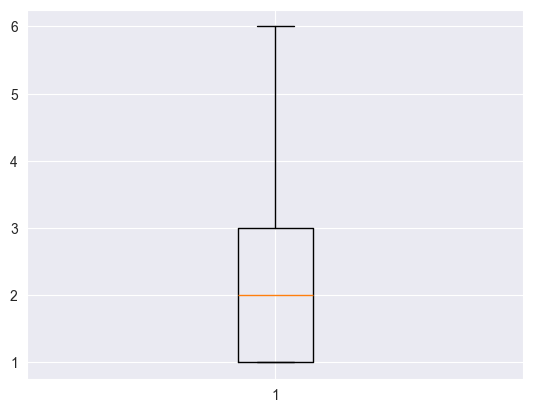

In [35]:
#Удалим выбросы
remove_outliers('rooms')

#### ceiling_height

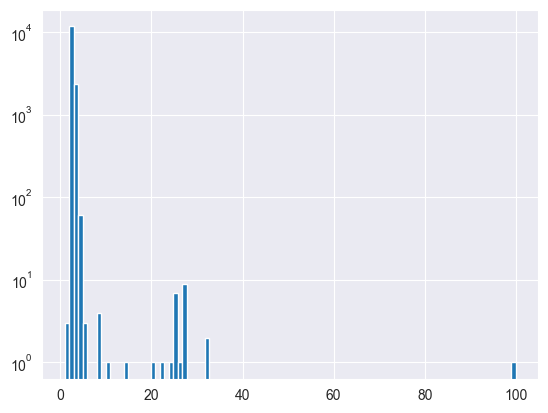

In [36]:
df['ceiling_height'].hist(bins=100, log=True)
plt.show()

<div class="alert alert-info"> здесь можно руководство просто логикой: потолки более 5 метров -ну это вряд ли, и пять метров - это дворец

In [37]:
#Уникальные значения
df['ceiling_height'].value_counts()

ceiling_height
2.50      3513
2.60      1643
2.70      1569
3.00      1071
2.80       990
          ... 
10.30        1
1.00         1
3.49         1
100.00       1
3.59         1
Name: count, Length: 172, dtype: int64

In [38]:
# В уникальных значениях высоты потолока есть двузначные значения 24.00, вероятно, здесь ошибка в указании десятой части. Сделаем замену
df['ceiling_height'] = df['ceiling_height'].apply(lambda x: x / 10 if x > 10 else x)

In [39]:
# Количество пустых значений
print(f"Количество пустых значений {df['ceiling_height'].isnull().sum()}")

Количество пустых значений 9042


In [40]:
print(f"Cреднее = {df['ceiling_height'].mean()}")
print(f"Медиана = {df['ceiling_height'].median()}")

Cреднее = 2.718446452335925
Медиана = 2.65


In [41]:
#Заменим пустые значения средним по всей выборке
df['ceiling_height'] = df['ceiling_height'].fillna(round(df['ceiling_height'].mean(),2))

<div class="alert alert-info"> я не уверена, что здесь нужно заполнять такое количество пропусков, это нам очень сильно исказиит данные , лучше оставить как есть

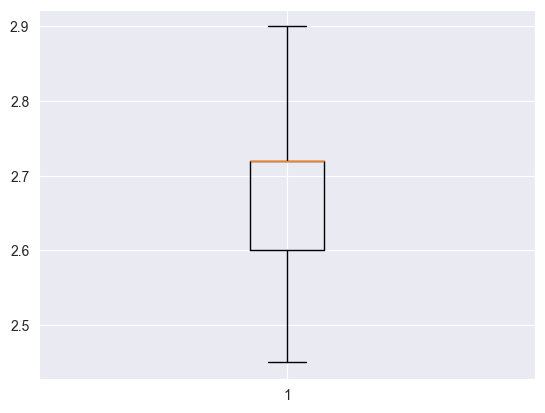

In [42]:
#Удалим выбросы
remove_outliers('ceiling_height')

#### floors_total

In [43]:
# просмотр уникальных значений
df['floors_total'].value_counts()

floors_total
5.0     4895
9.0     3670
12.0    1316
16.0    1272
10.0    1116
25.0    1052
17.0     787
4.0      762
14.0     534
3.0      507
18.0     485
6.0      483
24.0     452
7.0      363
23.0     334
15.0     327
19.0     315
2.0      309
22.0     278
8.0      275
20.0     255
13.0     214
11.0     172
27.0     164
21.0     156
26.0     121
35.0      24
1.0       21
28.0      21
36.0       3
34.0       1
60.0       1
29.0       1
33.0       1
52.0       1
Name: count, dtype: int64

In [44]:
# Количество пустых значений
print(f"Количество пустых значений {df['floors_total'].isnull().sum()}")

Количество пустых значений 84


In [45]:
#Удалим строки с пустыми значенями, так как их меньше 0,5%
df = df.dropna(subset=['floors_total'])

In [46]:
#Приведем значения к типу int
df['floors_total'] = df.floors_total.astype(int)

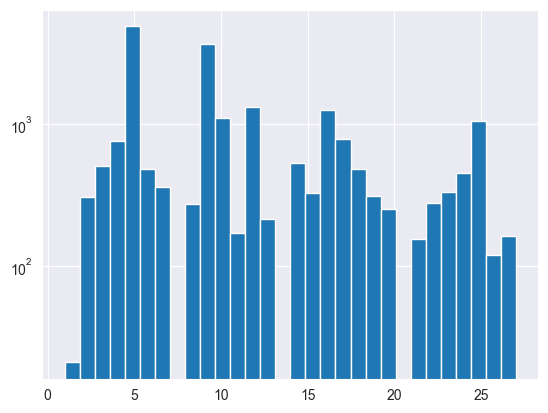

In [47]:
#Уберем 1% аномальных значений. Воспользуемся 99% персентилем
threshold = df['floors_total'].quantile(0.99)
df = df[df.floors_total <= threshold]

# Визуализируем
df['floors_total'].hist(bins=30, log=True)
plt.show()

#### living_area 

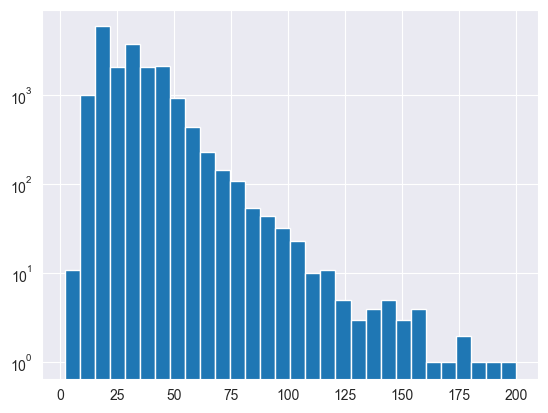

In [48]:
df['living_area'].hist(bins=30, log=True)
plt.show()

In [49]:
# # Просмотр уникальных значений
# df['living_area'].unique()

In [50]:
# Проверка на пропущенные значения
print(f"Количество пропущенных значений: {df['living_area'].isna().sum()}")

Количество пропущенных значений: 1670


In [51]:
# Замена пропусков в living_area средним значением для тех же total_area
df['living_area'] = df.groupby(df['living_area'].round())['living_area'].transform(lambda group: group.fillna(group.mean()))

In [52]:
df.groupby(df['total_area'].round())['living_area'].mean()

total_area
12.0      10.0
13.0      10.0
14.0      11.0
15.0       NaN
16.0      11.5
         ...  
283.0     99.0
284.0    130.3
295.0      NaN
320.0    190.0
327.0    177.3
Name: living_area, Length: 211, dtype: float64

In [53]:
#Оставшийся пропуск заменим на число 11
df.loc[df['total_area'].round()== 15.00, 'living_area'] = 11.0

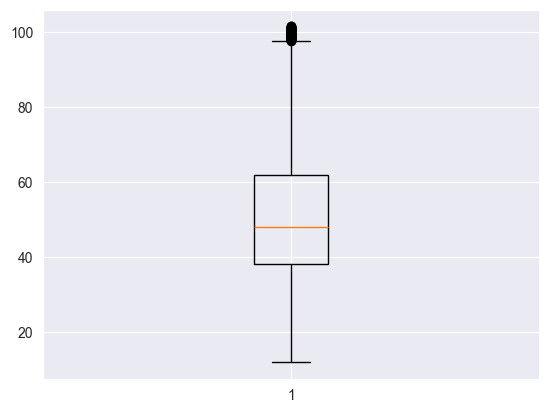

In [54]:
#Удалим выбросы
remove_outliers('total_area')

In [55]:
#округлим до двух знаков после запятой
df['living_area'] = df['living_area'].round(2)

#### floor

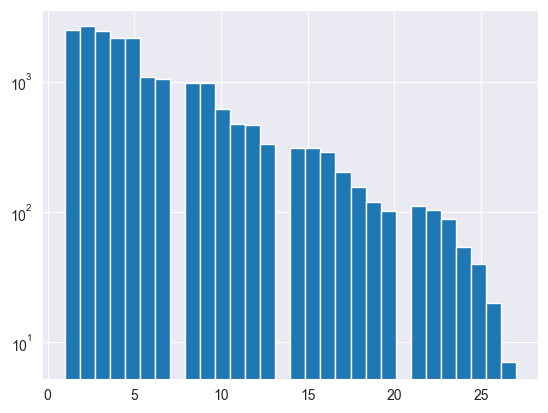

In [56]:
df['floor'].hist(bins=30, log=True)
plt.show()

In [57]:
# Просмотр уникальных значений
df['floor'].value_counts()

floor
2     2656
1     2490
3     2436
4     2179
5     2161
6     1082
7     1058
8      979
9      979
10     614
11     471
12     462
13     333
15     309
14     308
16     289
17     202
18     156
19     119
21     111
22     103
20     102
23      88
24      54
25      40
26      20
27       7
Name: count, dtype: int64

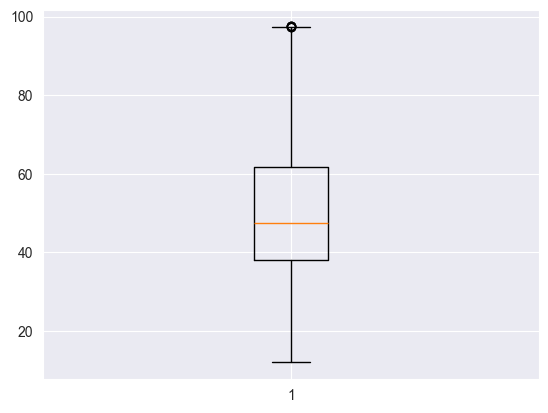

In [58]:
#Удалим выбросы
remove_outliers('total_area')

#### is_apartment

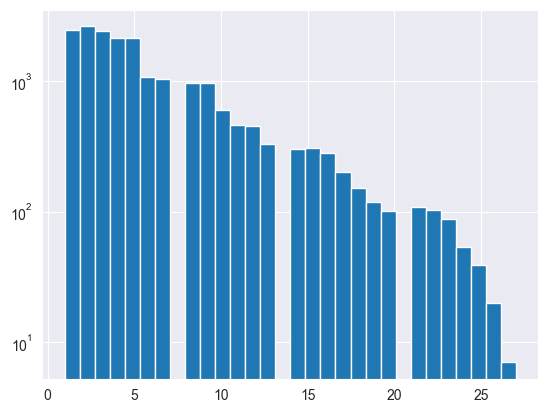

In [59]:
df['floor'].hist(bins=30, log=True)
plt.show()

In [60]:
df['is_apartment']

1        NaN
2        NaN
5        NaN
6        NaN
7        NaN
        ... 
23692    NaN
23693    NaN
23695    NaN
23696    NaN
23698    NaN
Name: is_apartment, Length: 19627, dtype: object

In [61]:
#Уникальные значения
df['is_apartment'].value_counts() 

is_apartment
False    2218
True       14
Name: count, dtype: int64

In [62]:
# Проверка на пропущенные значения
print(f"Количество пропущенных значений: {df['is_apartment'].isna().sum()}")

Количество пропущенных значений: 17395


In [63]:
#Заменим пропуски на False (не апартамены, а квартира)
df['is_apartment'] = df['is_apartment'].astype(bool).fillna(False)

#### studio

In [64]:
# Просмотр уникальных значений
df['studio'].value_counts()

studio
False    19493
True       134
Name: count, dtype: int64

#### open_plan

In [65]:
# Просмотр уникальных значений
df['open_plan'].value_counts()

open_plan
False    19566
True        61
Name: count, dtype: int64

#### balcony

In [66]:
# Просмотр уникальных значений
df['balcony'].value_counts()

balcony
1.0    3649
2.0    3303
0.0    3094
5.0     224
4.0     120
3.0      54
Name: count, dtype: int64

In [67]:
#Проверяем кол-во пропусков
print(f"Кол-во пропусков в balcony: {df['balcony'].isna().sum()}")

Кол-во пропусков в balcony: 9183


In [68]:
# Заменим отсутствующие значения в столбце balcony на 0
df['balcony'] = df['balcony'].fillna(0)

In [69]:
# Поменяем тип данных на int
df['balcony'] = df['balcony'].astype(int)

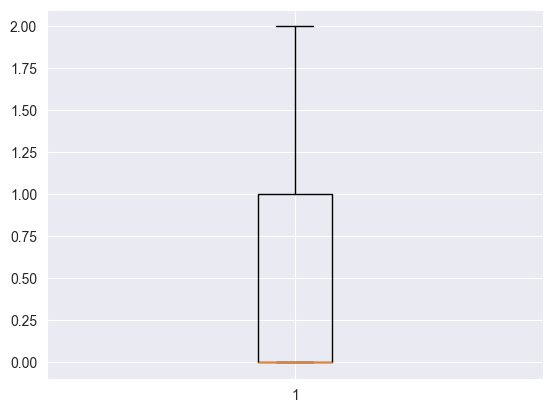

In [70]:
#Удалим выбросы
remove_outliers('balcony')

#### kitchen_area

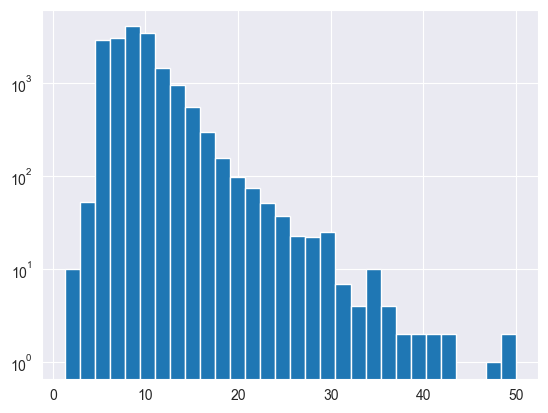

In [71]:
df['kitchen_area'].hist(bins=30, log=True)
plt.show()

In [72]:
# # Просмотр значений
# df['kitchen_area'].unique()

In [73]:
# Проверка на пропущенные значения
print(f"Количество пропущенных значений: {df['kitchen_area'].isna().sum()}")

Количество пропущенных значений: 1901


Определим значение для замены пропусков: рассчитаем для каждой строки разницу между total_area и living_area, а затем рассчитаем какой процент от нежилой зоны в среднем занимает кухня

In [74]:
# доля, которую в среднем занимает кухня от нежилой территории
median_kitchen_percentage = round((df['kitchen_area'] / (df['total_area'] - df['living_area'])).median(), 1)
print(f'Доля кухни от нежилой зоны в среднем равна {median_kitchen_percentage}')

Доля кухни от нежилой зоны в среднем равна 0.4


In [75]:
#для каждой строки, где известы total_area и living_area, получим значение для kitchen_area
df.loc[df['kitchen_area'].isna(), 'kitchen_area'] = df['total_area'] - df['living_area'] * median_kitchen_percentage

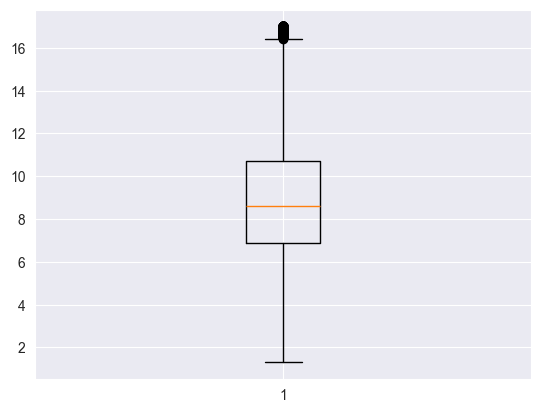

In [76]:
#Удалим выбросы
remove_outliers('kitchen_area')

#### airports_nearest

In [77]:
# Проверка на пропущенные значения
print(f"Количество пропущенных значений: {df['airports_nearest'].isna().sum()}")

Количество пропущенных значений: 4375


In [78]:
#Оставим незаполненными, так как нет возможности заполнить

#### cityCenters_nearest

In [79]:
# Проверка на пропущенные значения
print(f"Количество пропущенных значений: {df['cityCenters_nearest'].isna().sum()}")

Количество пропущенных значений: 4365


In [80]:
#Оставим незаполненными, так как нет возможности заполнить

#### days_exposition

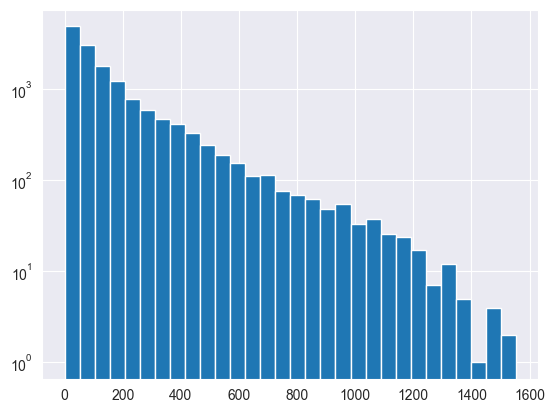

In [81]:
df['days_exposition'].hist(bins=30, log=True)
plt.show()

In [82]:
# # Просмотр уникальных значений
# df['days_exposition'].unique()

In [83]:
df['days_exposition'].max()

np.float64(1553.0000000000002)

In [84]:
# Проверка на пропущенные значения
print(f"Количество пропущенных значений: {df['days_exposition'].isna().sum()}")

Количество пропущенных значений: 2022


In [85]:
#Замена пропусков
df['days_exposition'] = df['days_exposition'].fillna(0)

<div class="alert alert-info"> Не уверена, что здесь стоит заполнять нолями, если честно, но вряд ли кв продавалась в тот же день, уж лучше оставить как есть, данные много

In [86]:
#Изменение типа данных
df['days_exposition'] = df['days_exposition'].astype('int')

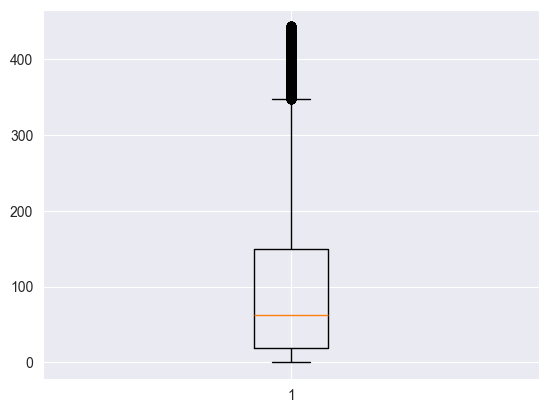

In [87]:
#Удалим выбросы
remove_outliers('days_exposition')

#### locality_name

In [88]:
# Просмотр уникальных значений
df['locality_name'].unique()

array(['посёлок Шушары', 'городской посёлок Янино-1', 'посёлок Парголово',
       'посёлок Мурино', 'Санкт-Петербург', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Колпино', 'Гатчина',
       'поселок Мурино', 'деревня Фёдоровское', 'Выборг', 'Кронштадт',
       'Кировск', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Всеволожск', 'Волхов',
       'Кингисепп', 'Приозерск', 'деревня Куттузи', 'Сестрорецк',
       'посёлок Аннино', 'деревня Заклинье', 'поселок Торковичи',
       'поселок Первомайское', 'Красное Село', 'посёлок Понтонный',
       'деревня Старая', 'Павловск', 'деревня Лесколово', 'Ивангород',
       'деревня Новое Девяткино', 'Сланцы', 'Шлиссельбург', 'Сясьстрой',
       'Никольское', 'Зеленогорск', 'поселок Новый Свет',
       'деревня Кальтино', 'Кудрово', 'поселок Р

In [89]:
print(f"Количество уникальных значений до замены: {len(df['locality_name'].unique())}")

Количество уникальных значений до замены: 332


In [90]:
#замена названий
names_variant = {'посёлок': 'поселок',
                 'посёлок городского типа': 'поселок',
                 'поселок городского типа': 'поселок',
                 'городской поселок': 'поселок',
                 'городской посёлок': 'поселок',
                 'поселок при железнодорожной станции': 'поселок',
                 'посёлок при железнодорожной станции': 'поселок',
                 'поселок станции': 'поселок',
                 'посёлок станции': 'поселок'}
df['locality_name'] = df['locality_name'].replace(names_variant, regex=True)

In [91]:
print(f"Количество уникальных значений после замены: {len(df['locality_name'].unique())}")

Количество уникальных значений после замены: 307


In [92]:
# Проверка на пропущенные значения
print(f"Количество пропущенных значений: {df['locality_name'].isna().sum()}")

Количество пропущенных значений: 20


<div class="alert alert-info">  я бы удаляиала, так как место играет роль в цене, а туту его нет, значений немного


#### parks_nearest и parks_around3000

In [93]:
df['parks_around3000'].value_counts()

parks_around3000
0.0    6991
1.0    3363
2.0     866
3.0     233
Name: count, dtype: int64

Проверим зависимость между столбцами "parks_around3000" - число парков в радиусе 3 км и "parks_nearest" - расстояние до ближайшего парка (м).

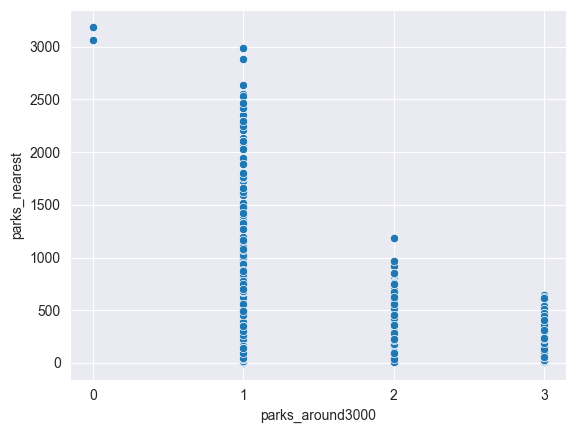

In [94]:
filtered_df = df[(df['parks_around3000'].notna()) & (df['parks_nearest'].notna())]
x = filtered_df['parks_around3000']
y = filtered_df['parks_nearest']

sns.scatterplot(data=filtered_df, x=x, y=y)

plt.xticks(range(int(filtered_df['parks_around3000'].min()), int(filtered_df['parks_around3000'].max()) + 1))
plt.show()

In [95]:
filtered_df = df[(df['parks_around3000'] > 0)]
print(f"Если значение в parks_around3000 > 0, то пропущенных в parks_nearest {len(filtered_df[(pd.isna(filtered_df['parks_nearest']))])}, максимальное значение равно {filtered_df['parks_nearest'].max()}")

Если значение в parks_around3000 > 0, то пропущенных в parks_nearest 0, максимальное значение равно 2984.0


In [96]:
filtered_df = df[(df['parks_around3000'] == 0)]
print(f"Если значение в parks_around3000 == 0, то пропущенных в parks_nearest {len(filtered_df[(pd.isna(filtered_df['parks_nearest']))])}, максимальное значение равно {filtered_df['parks_nearest'].max()}") 

Если значение в parks_around3000 == 0, то пропущенных в parks_nearest 6988, максимальное значение равно 3190.0


In [97]:
filtered_df = df[(pd.isna(df['parks_around3000']))]
print(f"Если значение в parks_around3000 пропущено, то пропущенных в parks_nearest: {filtered_df['parks_nearest'].isna().sum()}, максимальное значение равно {filtered_df['parks_nearest'].max()}")

Если значение в parks_around3000 пропущено, то пропущенных в parks_nearest: 3971, максимальное значение равно nan


In [98]:
filtered_df = df[(pd.notna(df['parks_nearest']))]
print(f"Если значение в parks_nearest заполнено, то пропущенных в parks_around3000: {filtered_df['parks_around3000'].isna().sum()}, максимальное значение равно {filtered_df['parks_around3000'].max()}")

Если значение в parks_nearest заполнено, то пропущенных в parks_around3000: 0, максимальное значение равно 3.0


Исходя из результатов выше, можно разбить данные с пропусками в parks_nearest на две группы:

1 группа: известно, что в радиусе 3 км нет парка

2 группа: неизвестно, есть ли в радиусе 3 км парк, так как значение в parks_around3000 пропущено

Сделаем замену для первой группы в поле parks_nearest и укажем расстояние больше 3 км, например, 3100.
Для второй группы оставим пропуски.

In [99]:
#Известно, что в радиусе 3 км нет парка. Делаем замену:
filtered_df = df[(df['parks_around3000'] == 0)]
df.loc[(df['parks_nearest'].isna()) & (df['parks_around3000'] == 0), 'parks_nearest'] = 3100

In [100]:
#проверяем кол-во пропусков после замен
print(f"Кол-во пропусков в parks_around3000: {df['parks_around3000'].isna().sum()}")
print(f"Кол-во пропусков в parks_nearest: {df['parks_nearest'].isna().sum()}")

Кол-во пропусков в parks_around3000: 3971
Кол-во пропусков в parks_nearest: 3971


#### ponds_nearest и ponds_around3000

In [101]:
df['ponds_around3000'].value_counts()

ponds_around3000
0.0    6239
1.0    3584
2.0    1060
3.0     570
Name: count, dtype: int64

Все шаги выполним аналогично тому, что сделали для двух параметров выше:
Проверим зависимость между столбцами "ponds_around3000" - число водоемов в радиусе 3 км и "ponds_nearest" - расстояние до ближайшего водоема (м).

In [102]:
filtered_df = df[(df['ponds_around3000'] > 0)]
print(f"Если значение в ponds_around3000 > 0, то пропущенных в ponds_nearest {len(filtered_df[(pd.isna(filtered_df['ponds_nearest']))])}, максимальное значение равно {filtered_df['ponds_nearest'].max()}") 

Если значение в ponds_around3000 > 0, то пропущенных в ponds_nearest 0, максимальное значение равно 1344.0


In [103]:
filtered_df = df[(df['ponds_around3000'] == 0)]
print(f"Если значение в ponds_around3000 == 0, то пропущенных в ponds_nearest {len(filtered_df[(pd.isna(filtered_df['ponds_nearest']))])}, максимальное значение равно {filtered_df['ponds_nearest'].max()}") 

Если значение в ponds_around3000 == 0, то пропущенных в ponds_nearest 6239, максимальное значение равно nan


In [104]:
filtered_df = df[(pd.isna(df['ponds_around3000']))]
print(f"Если значение в ponds_around3000 пропущено, то пропущенных в ponds_nearest: {filtered_df['ponds_nearest'].isna().sum()}, максимальное значение равно {filtered_df['ponds_nearest'].max()}")

Если значение в ponds_around3000 пропущено, то пропущенных в ponds_nearest: 3971, максимальное значение равно nan


In [105]:
filtered_df = df[(pd.notna(df['ponds_nearest']))]
print(f"Если значение в parks_nearest заполнено, то пропущенных в ponds_around3000: {filtered_df['ponds_around3000'].isna().sum()}, максимальное значение равно {filtered_df['ponds_around3000'].max()}")

Если значение в parks_nearest заполнено, то пропущенных в ponds_around3000: 0, максимальное значение равно 3.0


Cделаем замены по аналогии со столбцами "parks_around3000" и "parks_nearest"

In [106]:
#1 Так как в ponds_nearest всегда NaN, когда ponds_around3000 = 0, заменим в этом случае пропуски фиксированным значением 3100
df.loc[(df['ponds_nearest'].isna()) & (df['ponds_around3000'] == 0), 'ponds_nearest'] = 3100

In [107]:
#проверяем кол-во пропусков после замен
print(f"Кол-во пропусков в ponds_around3000: {df['ponds_around3000'].isna().sum()}")
print(f"Кол-во пропусков в ponds_nearest: {df['ponds_nearest'].isna().sum()}")

Кол-во пропусков в ponds_around3000: 3971
Кол-во пропусков в ponds_nearest: 3971


### Результаты обработки

In [108]:
print(f'Количество строк до обработки = {len_df_start}, количество строк после обработки = {len(df)}')

Количество строк до обработки = 23699, количество строк после обработки = 15424


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15424 entries, 1 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          15424 non-null  int64         
 1   last_price            15424 non-null  float64       
 2   total_area            15424 non-null  float64       
 3   first_day_exposition  15424 non-null  datetime64[ns]
 4   rooms                 15424 non-null  int64         
 5   ceiling_height        15424 non-null  float64       
 6   floors_total          15424 non-null  int64         
 7   living_area           15142 non-null  float64       
 8   floor                 15424 non-null  int64         
 9   is_apartment          15424 non-null  bool          
 10  studio                15424 non-null  bool          
 11  open_plan             15424 non-null  bool          
 12  kitchen_area          15424 non-null  float64       
 13  balcony              

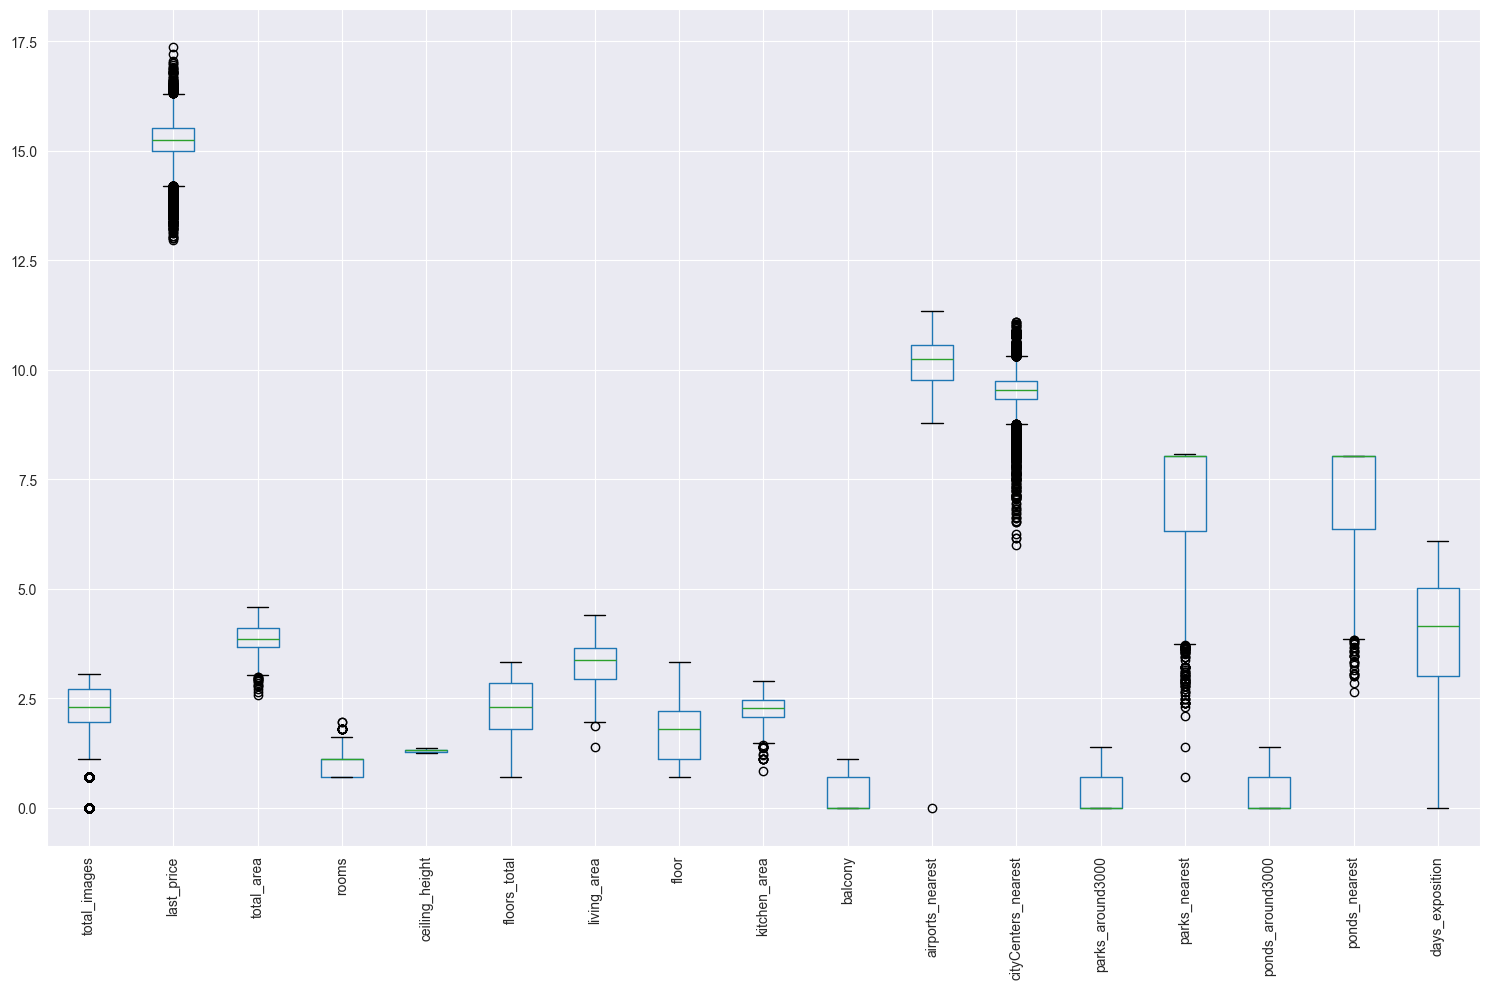

In [110]:
#выбросы
num_df = df.select_dtypes(include=['number'])
log_df = num_df.apply(lambda col: np.log(col + 1) if col.min() >= 0 else col)

plt.figure(figsize=(15, 10))
log_df.boxplot()

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Этап 2. Добавление новых признаков

Добавим новые временные признаки (год, месяц, день недели публикации объявления), признак цена за квадратный метр, тип этажа квартиры (первый, последний, первый и последний, другой)

In [111]:
df['year'] = df['first_day_exposition'].dt.year
df['month'] = df['first_day_exposition'].dt.month
df['weekday'] = df['first_day_exposition'].dt.weekday
df['price_per_m2'] = (df['last_price'] / df['total_area']).round(2)
df['floor_type'] = df.apply(lambda row: 'Первый и последний' if row['floor'] == 1 and row['floors_total'] == 1 else ('Первый' if row['floor'] == 1 else ('Последний' if row['floor'] == row['floors_total'] else 'Другой')),axis=1)

In [112]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,year,month,weekday,price_per_m2,floor_type
1,7,3350000.0,40.40,2018-12-04,1,2.72,11,18.60,1,True,False,False,11.00,2,поселок Шушары,12817.0,18603.0,0.0,3100.0,0.0,3100.0,81,2018,12,1,82920.79,Первый
5,10,2890000.0,30.40,2018-09-10,1,2.72,12,14.40,5,True,False,False,9.10,0,городской поселок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55,2018,9,0,95065.79,Другой
6,6,3700000.0,37.30,2017-11-02,1,2.72,26,10.60,6,True,False,False,14.40,1,поселок Парголово,52996.0,19143.0,0.0,3100.0,0.0,3100.0,155,2017,11,3,99195.71,Другой
8,20,2900000.0,33.16,2018-05-23,1,2.72,27,15.43,26,True,False,False,8.81,0,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189,2018,5,2,87454.76,Другой
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,True,False,False,6.50,2,Санкт-Петербург,50898.0,15008.0,0.0,3100.0,0.0,3100.0,289,2017,2,6,88524.59,Другой


Сделаем проверку новых признаков year и price_per_m2

In [113]:
df['year'].value_counts()

year
2018    5980
2017    5557
2019    2104
2016    1483
2015     295
2014       5
Name: count, dtype: int64

In [114]:
#уберем данные за 2015 и 2014 год, как уже устаревшие
df = df.query("year != 2014 and year != 2015")

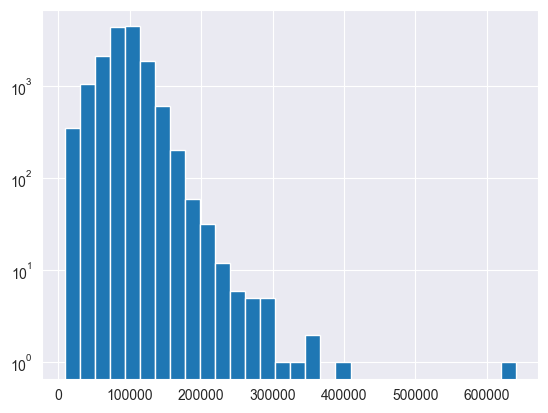

In [115]:
df.price_per_m2.hist(bins=30, log=True);

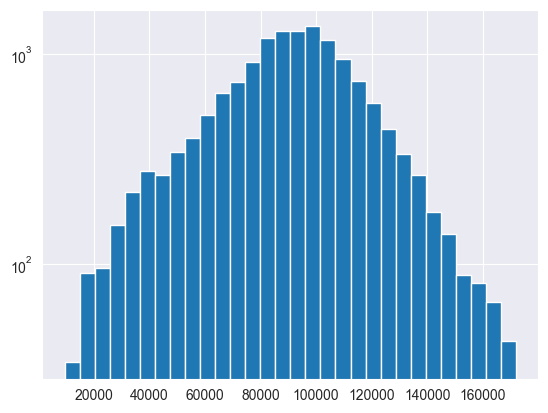

In [116]:
#Уберем 1% аномальных значений. Воспользуемся 99% персентилем, чтобы убрать аномально высокие значения
threshold = df['price_per_m2'].quantile(0.99)
df = df[df.price_per_m2 <= threshold]

# Визуализируем
df['price_per_m2'].hist(bins=30, log=True)
plt.show()

In [117]:
#сохраним обработтаные данные в новый датасет
df.to_csv('real_estate_processed.csv', index=False)

## Этап 3. Разведывательный анализ данных/EDA

### 3.1 Анализ распределния и статистических метрик

Еще раз посмотрим на данные

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14972 entries, 1 to 23698
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          14972 non-null  int64         
 1   last_price            14972 non-null  float64       
 2   total_area            14972 non-null  float64       
 3   first_day_exposition  14972 non-null  datetime64[ns]
 4   rooms                 14972 non-null  int64         
 5   ceiling_height        14972 non-null  float64       
 6   floors_total          14972 non-null  int64         
 7   living_area           14696 non-null  float64       
 8   floor                 14972 non-null  int64         
 9   is_apartment          14972 non-null  bool          
 10  studio                14972 non-null  bool          
 11  open_plan             14972 non-null  bool          
 12  kitchen_area          14972 non-null  float64       
 13  balcony              

In [119]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,year,month,weekday,price_per_m2,floor_type
1,7,3350000.0,40.40,2018-12-04,1,2.72,11,18.60,1,True,False,False,11.00,2,поселок Шушары,12817.0,18603.0,0.0,3100.0,0.0,3100.0,81,2018,12,1,82920.79,Первый
5,10,2890000.0,30.40,2018-09-10,1,2.72,12,14.40,5,True,False,False,9.10,0,городской поселок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55,2018,9,0,95065.79,Другой
6,6,3700000.0,37.30,2017-11-02,1,2.72,26,10.60,6,True,False,False,14.40,1,поселок Парголово,52996.0,19143.0,0.0,3100.0,0.0,3100.0,155,2017,11,3,99195.71,Другой
8,20,2900000.0,33.16,2018-05-23,1,2.72,27,15.43,26,True,False,False,8.81,0,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189,2018,5,2,87454.76,Другой
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,True,False,False,6.50,2,Санкт-Петербург,50898.0,15008.0,0.0,3100.0,0.0,3100.0,289,2017,2,6,88524.59,Другой


Построим распределения и ящик различных призанков: какчественных и количественных для понимая , с какими данными мы имеем дело

In [120]:
# Количественные признака
num_features = df.select_dtypes(include=['int', 'float']).columns.tolist()
print(num_features)

['total_images', 'last_price', 'total_area', 'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor', 'kitchen_area', 'balcony', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition', 'year', 'month', 'weekday', 'price_per_m2']


In [121]:
# Категориальный признаки с вкулючение булевого типа
cat_features = df.select_dtypes(include=['object','bool']).columns.tolist()
print(cat_features)

['is_apartment', 'studio', 'open_plan', 'locality_name', 'floor_type']


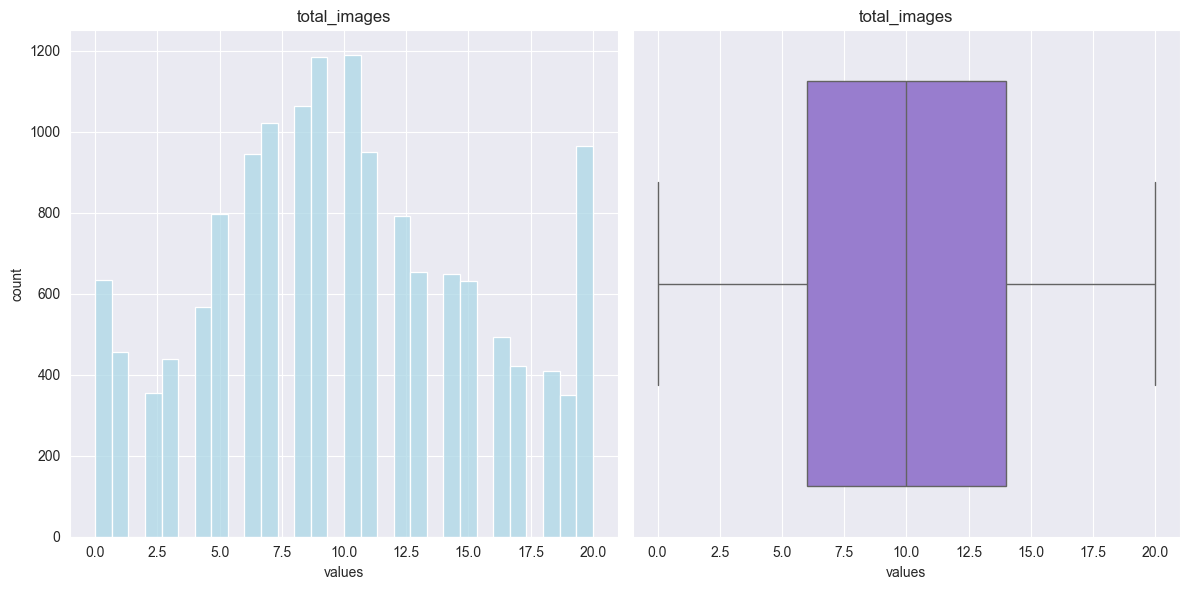

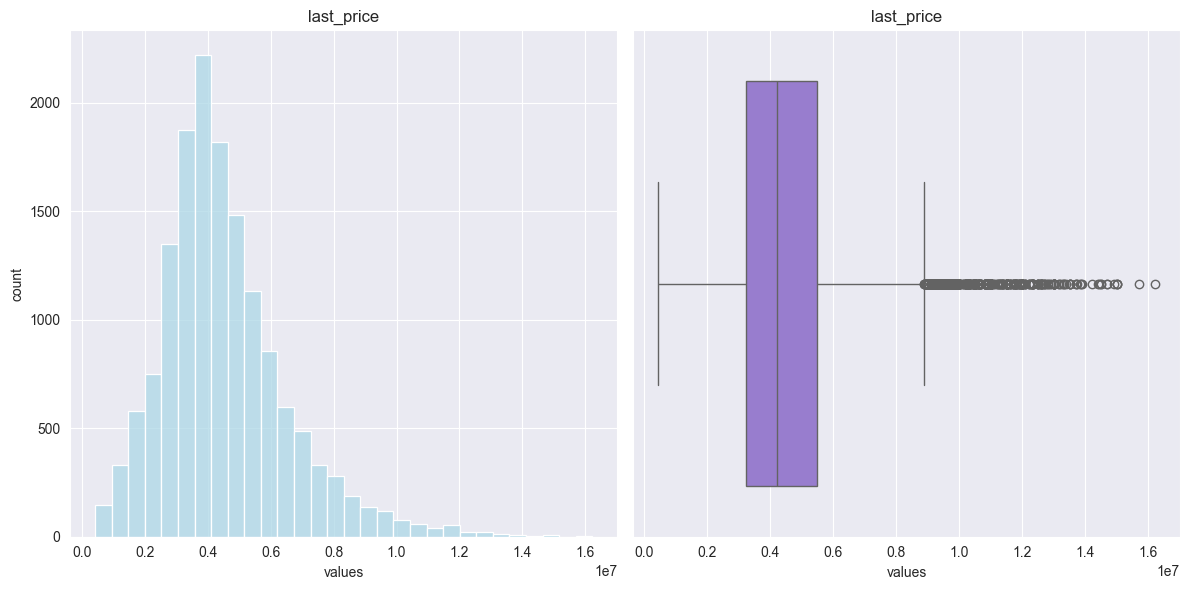

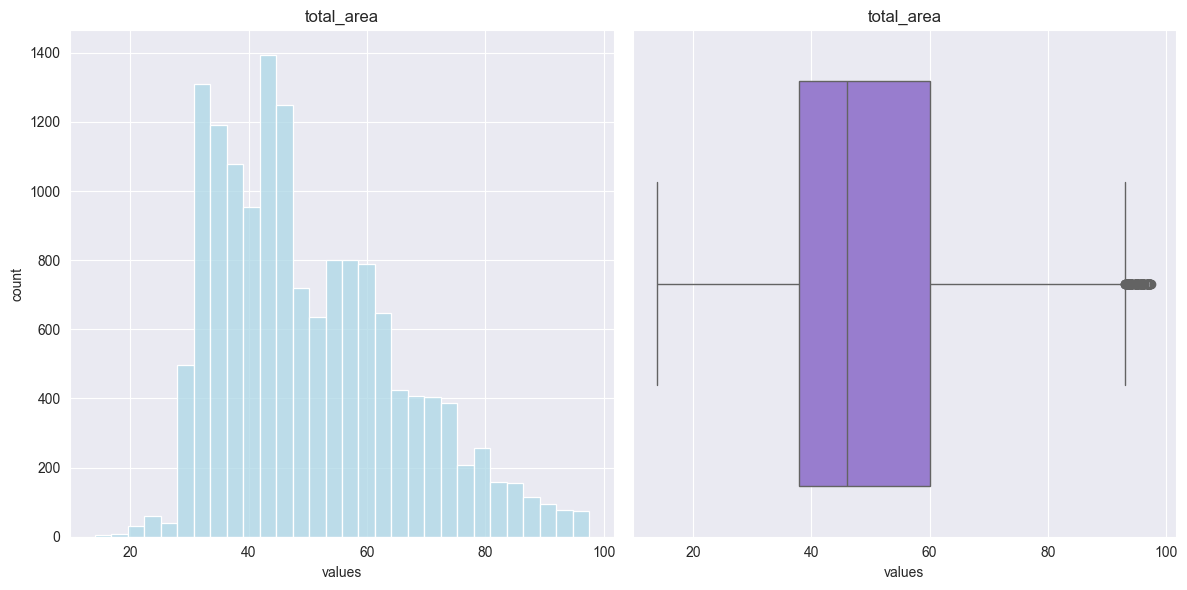

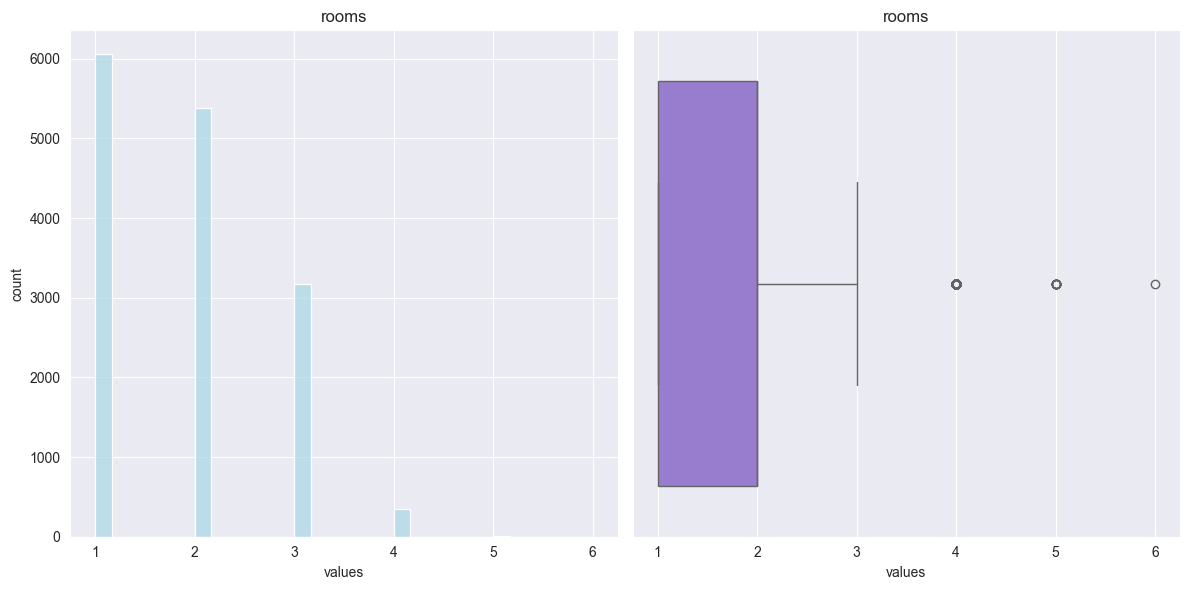

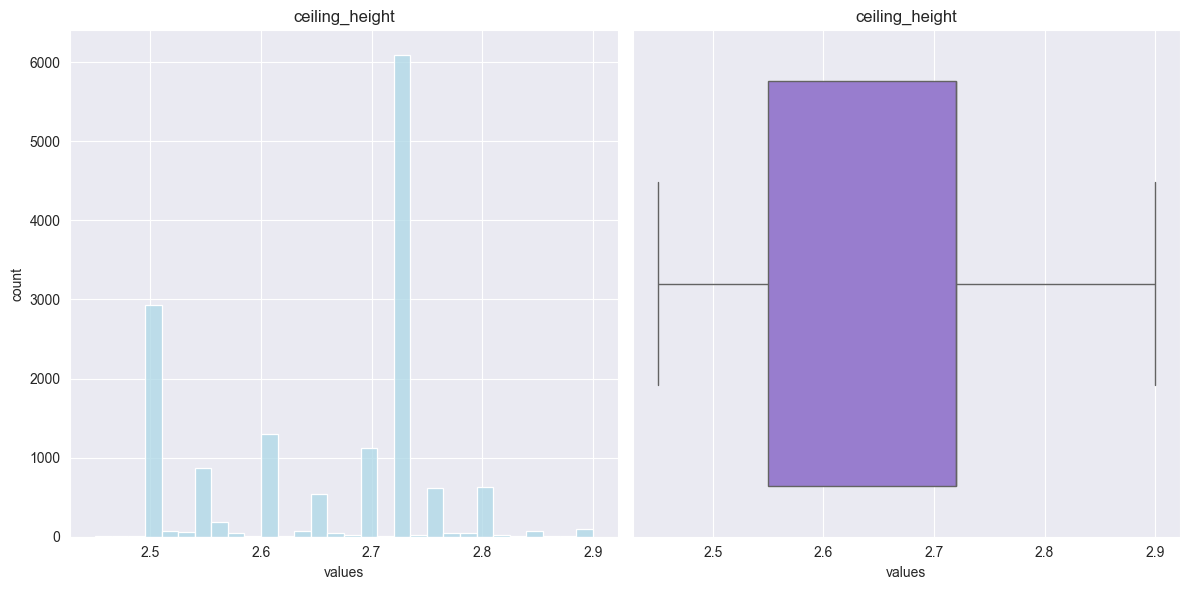

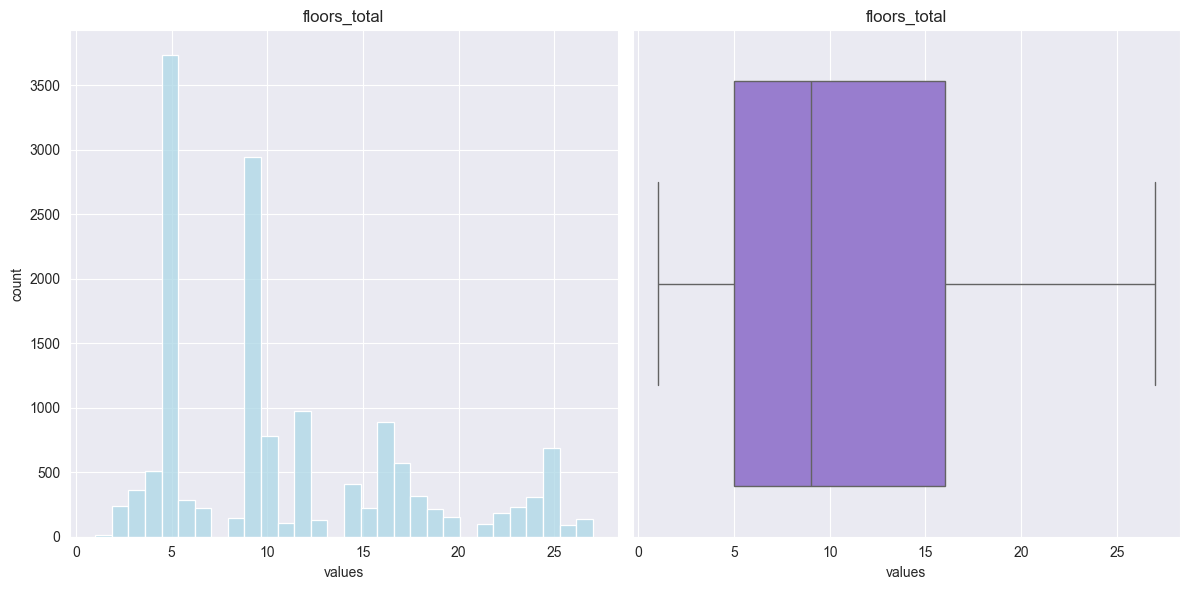

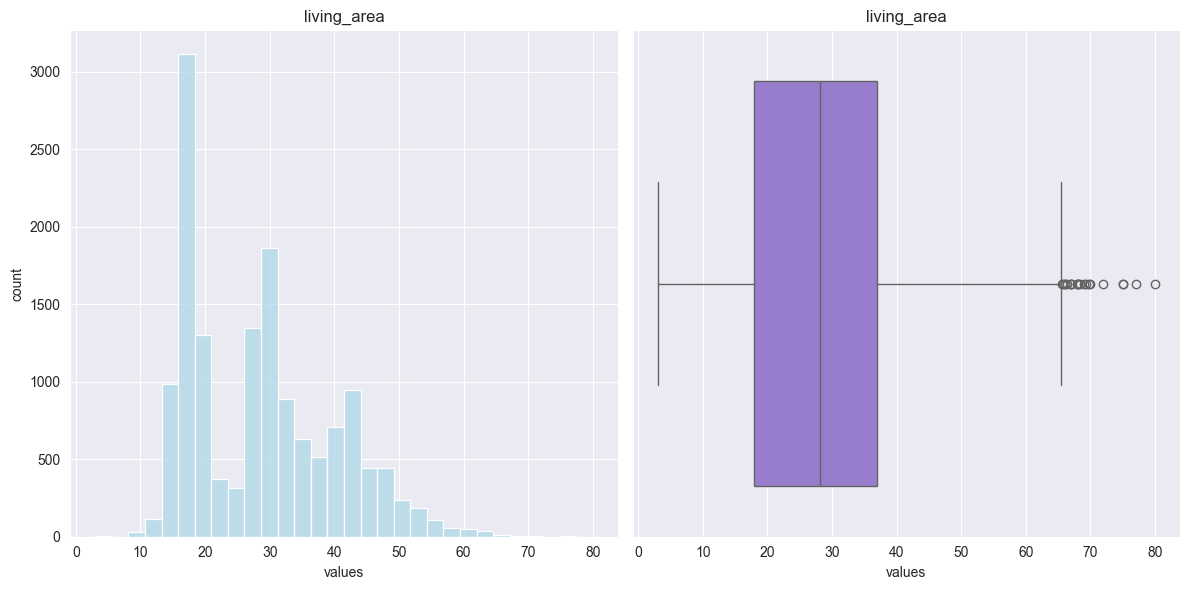

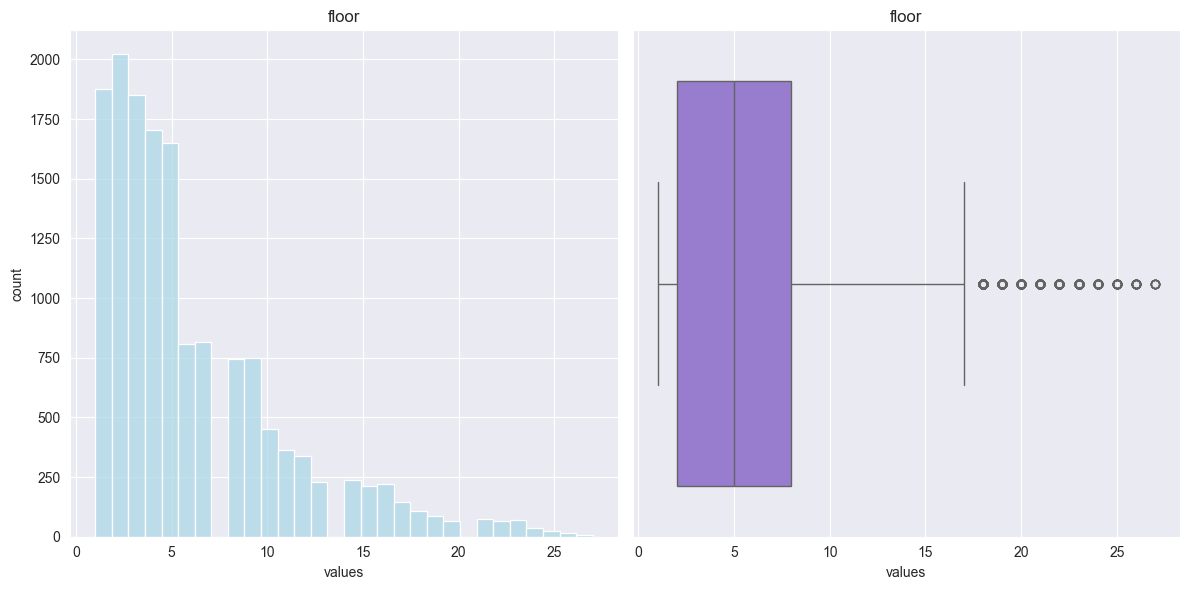

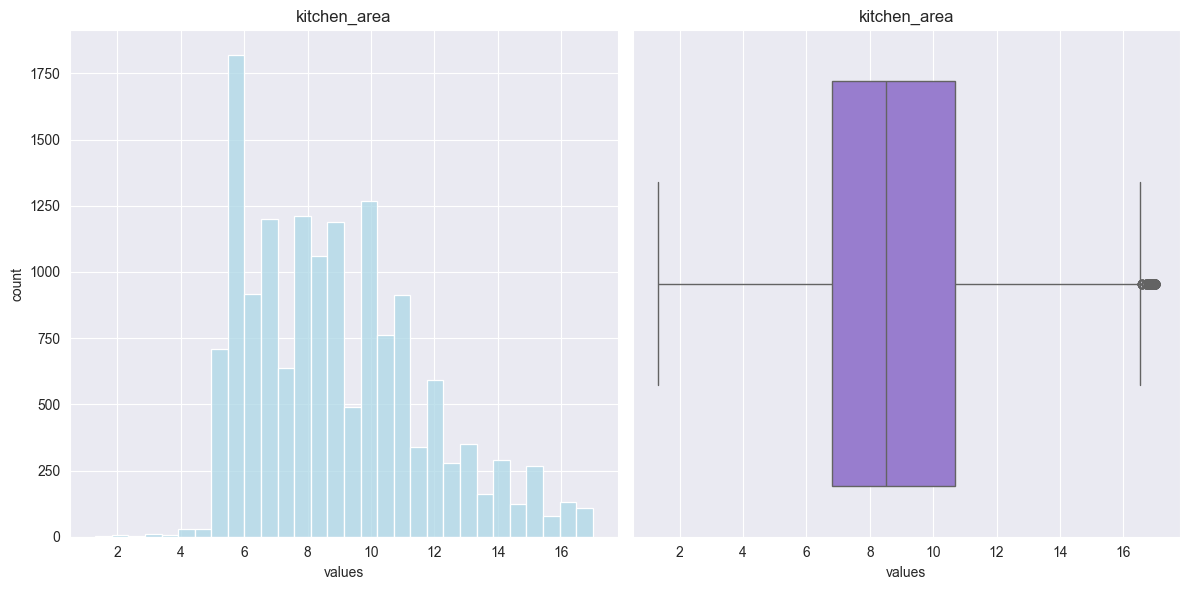

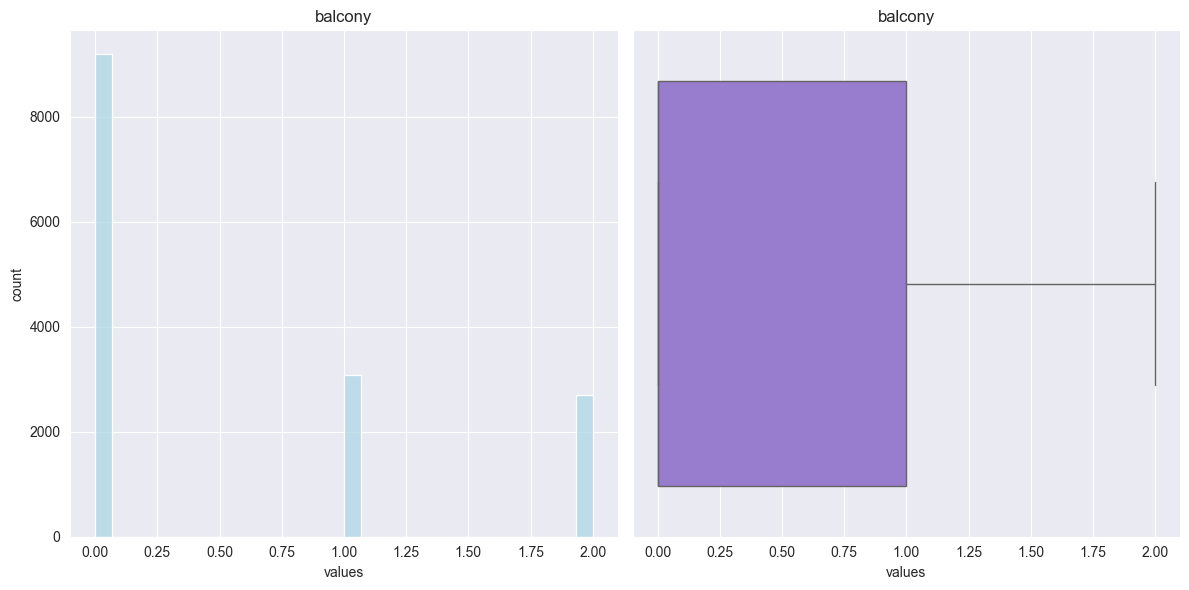

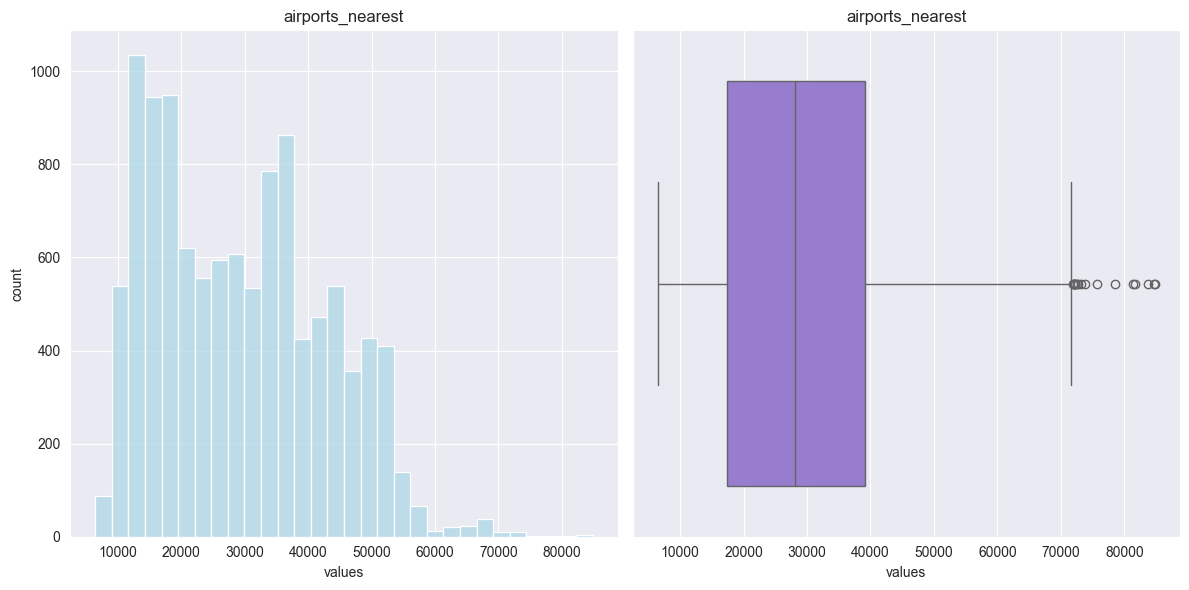

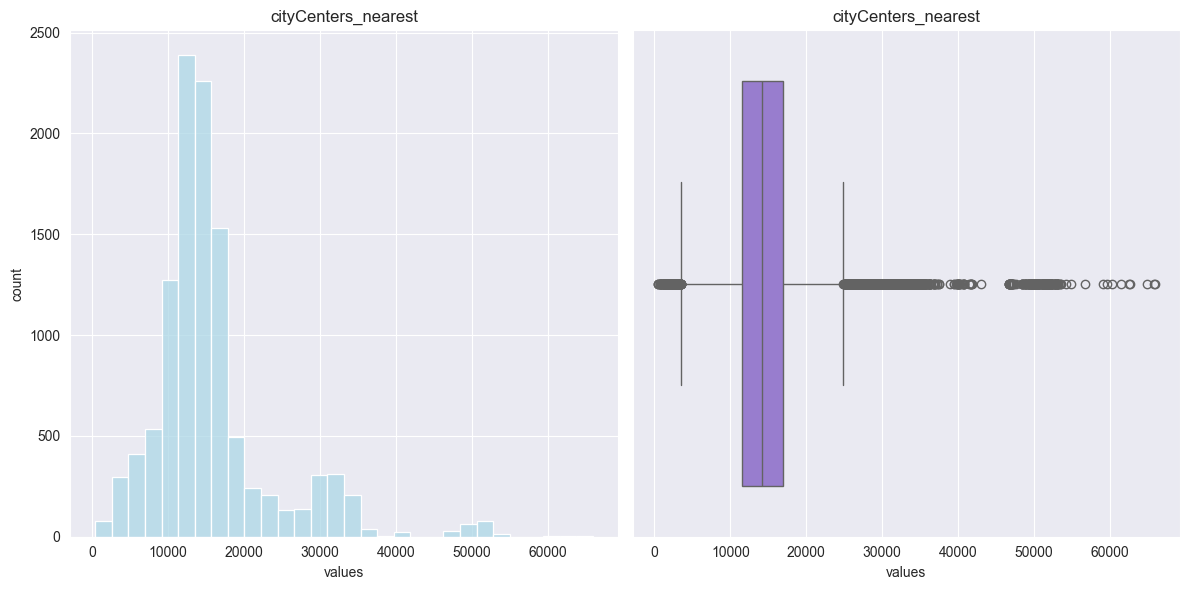

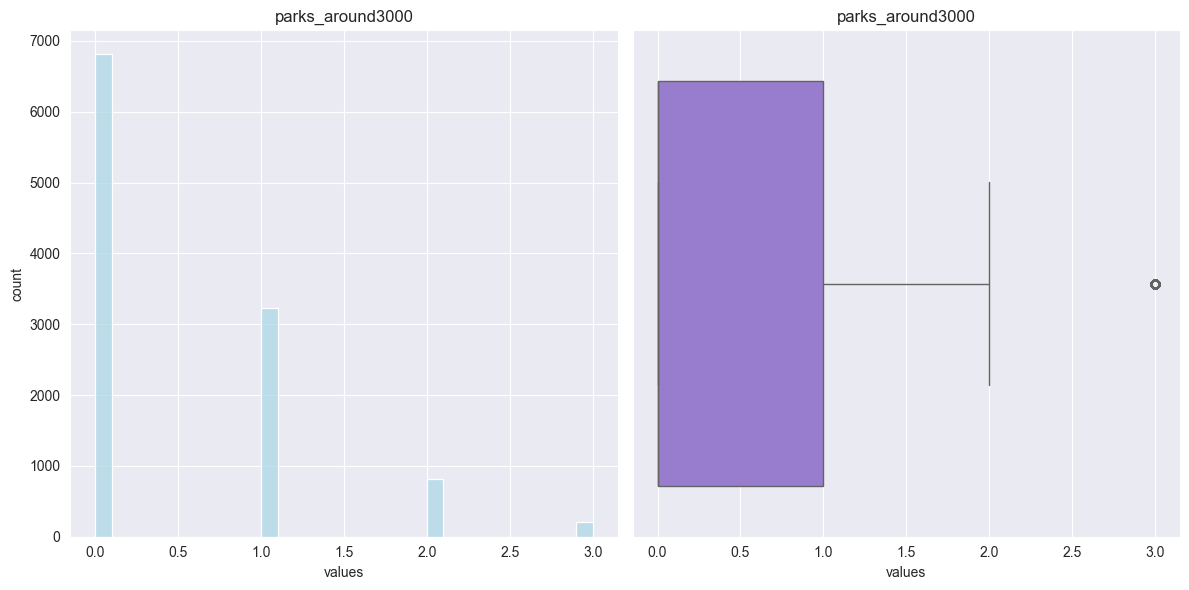

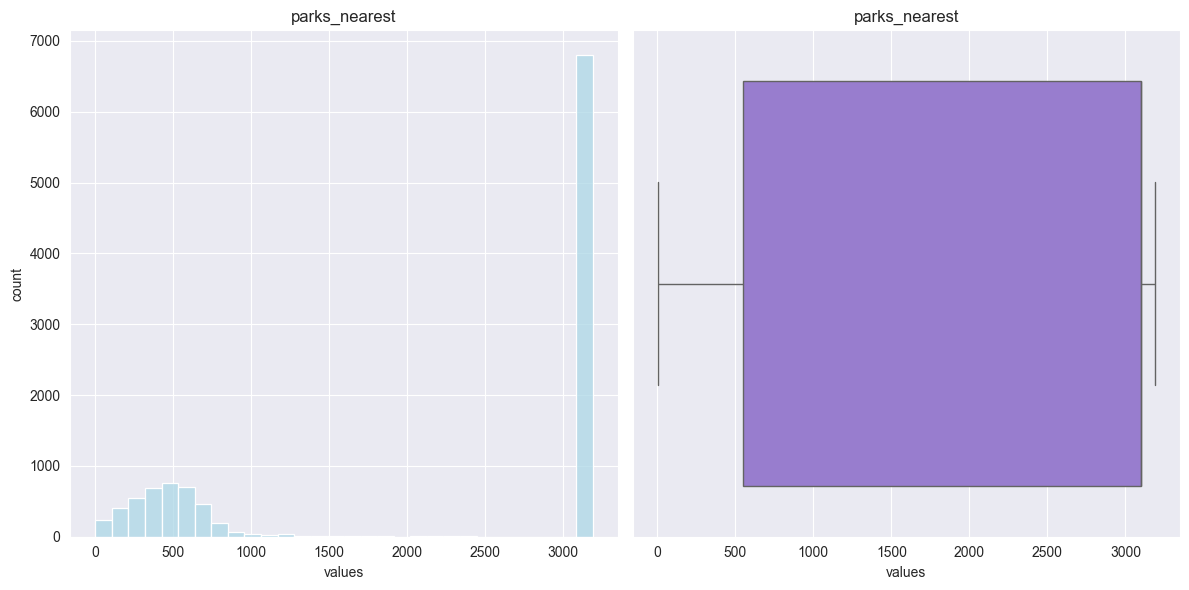

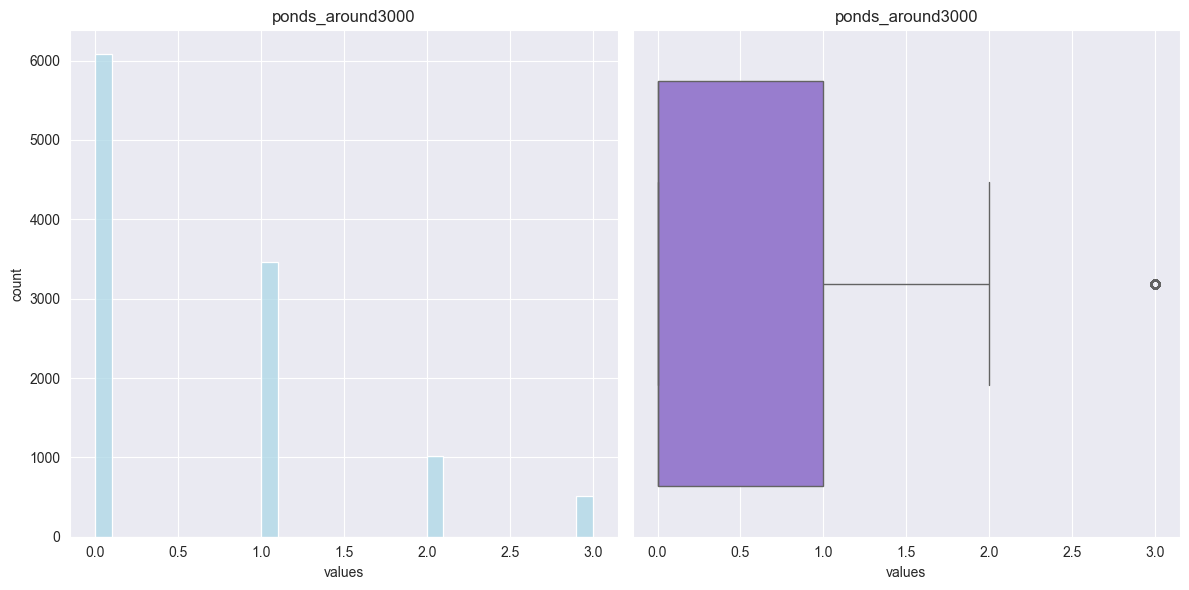

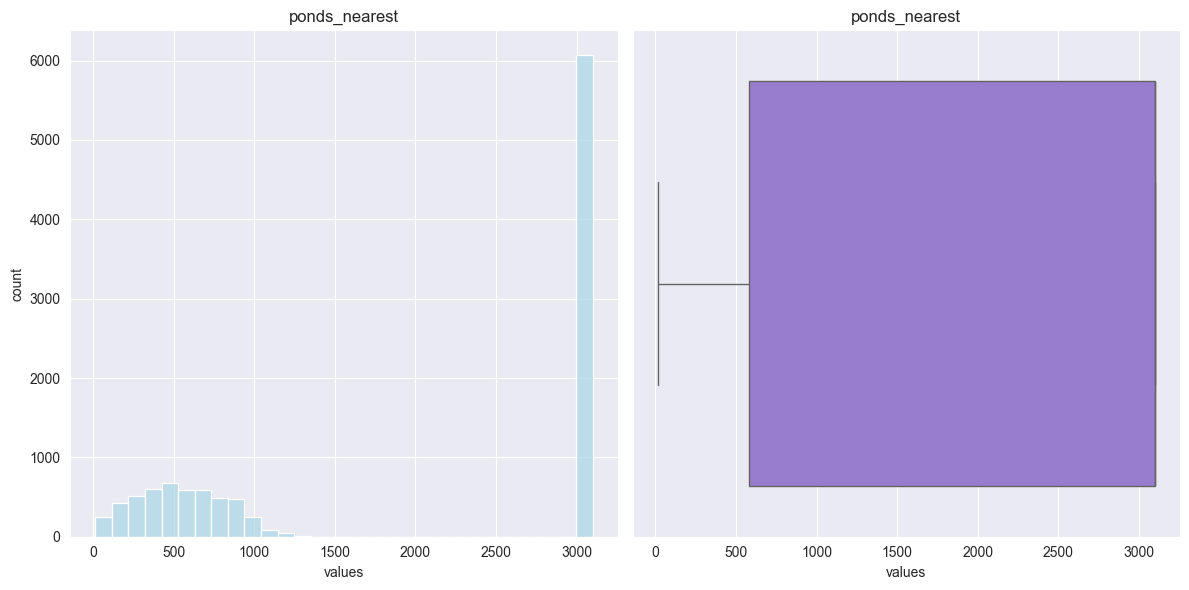

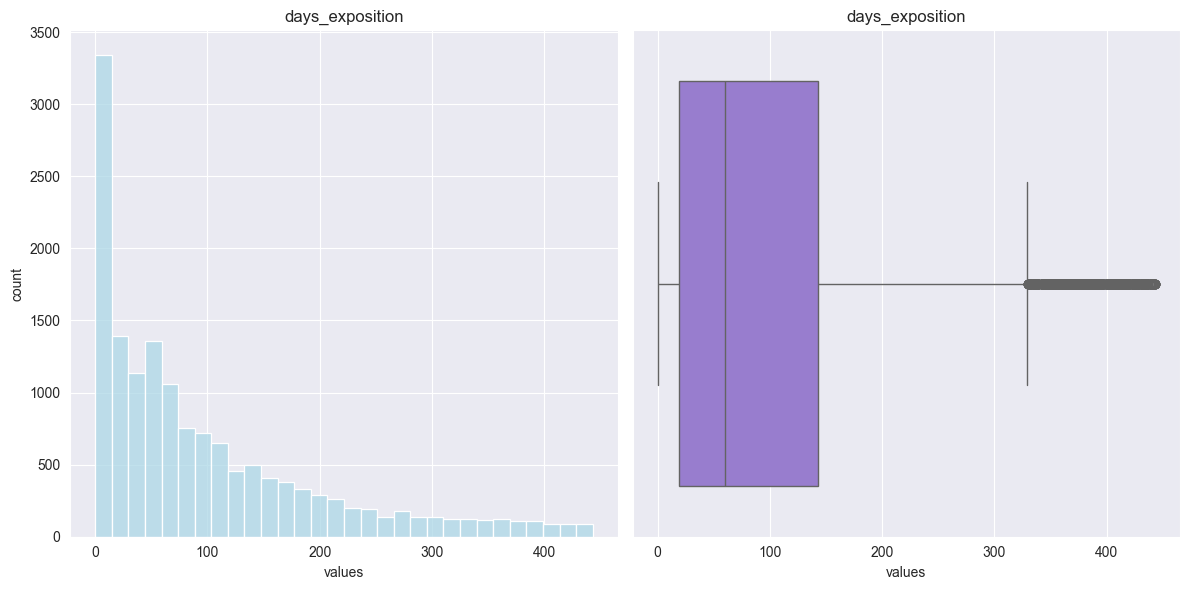

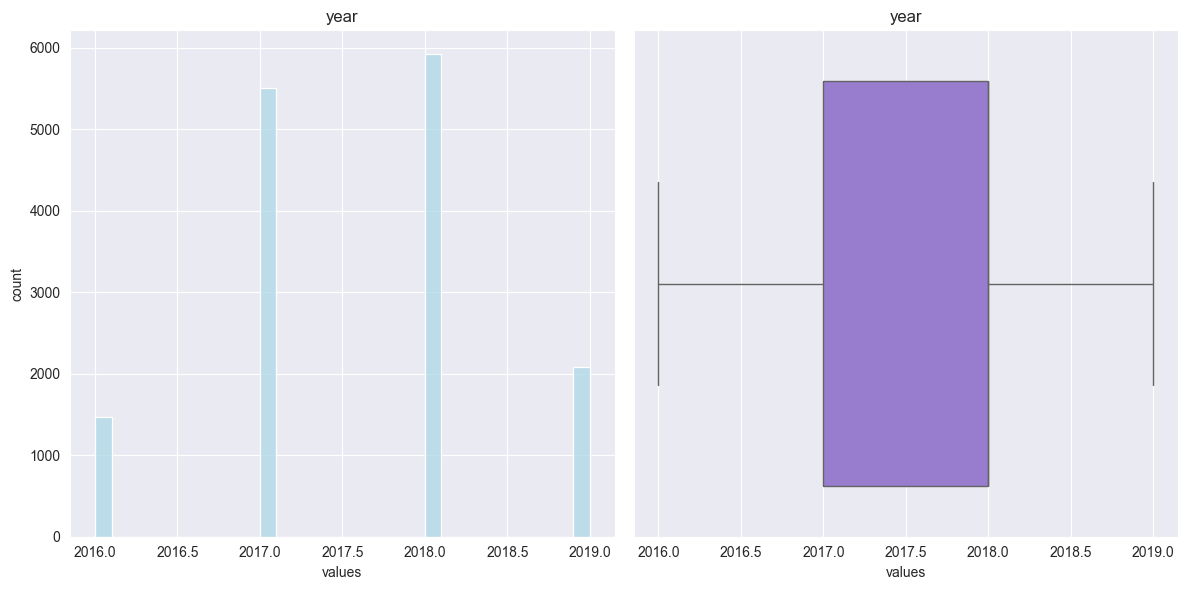

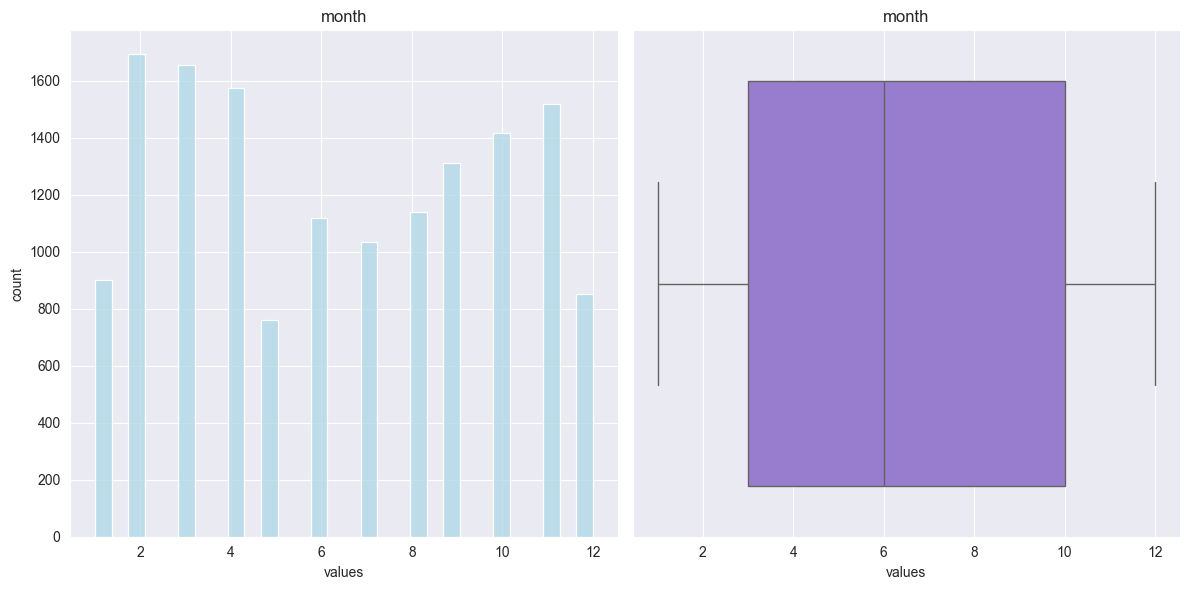

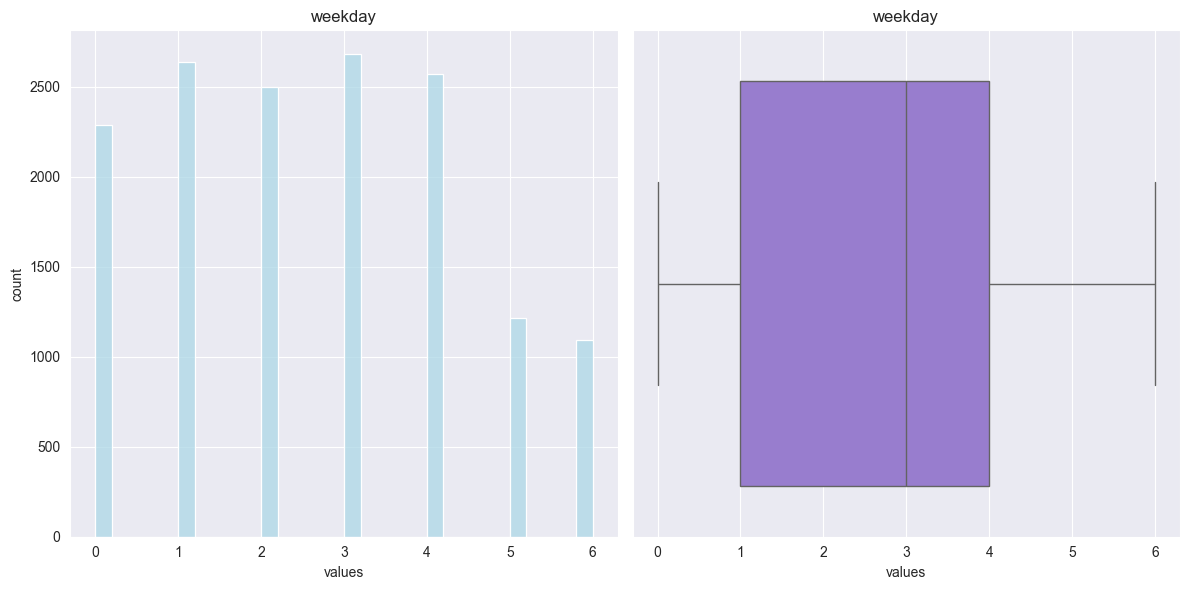

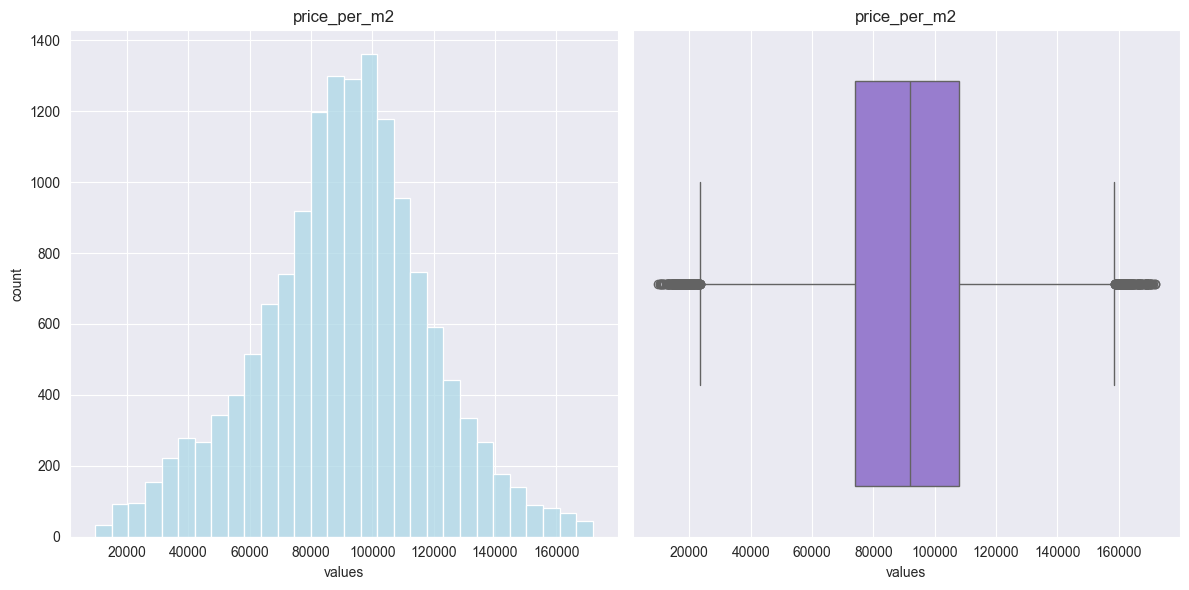

In [122]:
# Функция для графика распредения количественных признаков и ящика с усами
for col in num_features:
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))


    sns.histplot(df[col], bins=30, kde=False, color='lightblue', ax=ax1)
    ax1.set_title(col)
    ax1.set_xlabel('values')
    ax1.set_ylabel('count')


    sns.boxplot(x=df[col], ax=ax2, color='mediumpurple')
    ax2.set_title(col)
    ax2.set_xlabel('values')


    plt.tight_layout()


    plt.show()

In [123]:
# Используем describe() для получения статистик по нашим данным
df.describe()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,year,month,weekday,price_per_m2
count,14972.000000,1.497200e+04,14972.000000,14972,14972.000000,14972.000000,14972.000000,14696.000000,14972.000000,14972.000000,14972.000000,11064.000000,11073.000000,11073.000000,11073.000000,11073.000000,11073.000000,14972.000000,14972.000000,14972.000000,14972.000000,14972.000000
mean,9.888392,4.520667e+06,50.194034,2018-01-22 15:59:58.076409088,1.857467,2.654443,10.936415,28.752658,5.976222,8.953289,0.567192,29268.266540,15766.927391,0.497065,2095.146934,0.636142,1947.691953,97.864347,2017.574673,6.365683,2.576075,90617.691112
min,0.000000,4.300000e+05,14.000000,2016-01-05 00:00:00,1.000000,2.450000,1.000000,3.000000,1.000000,1.300000,0.000000,6450.000000,399.000000,0.000000,1.000000,0.000000,13.000000,0.000000,2016.000000,1.000000,0.000000,9615.380000
25%,6.000000,3.229250e+06,38.000000,2017-08-03 00:00:00,1.000000,2.550000,5.000000,18.000000,2.000000,6.800000,0.000000,17430.000000,11537.000000,0.000000,552.000000,0.000000,581.000000,19.000000,2017.000000,3.000000,1.000000,74137.930000
50%,10.000000,4.200000e+06,46.100000,2018-02-01 00:00:00,2.000000,2.720000,9.000000,28.100000,5.000000,8.500000,0.000000,28101.000000,14112.000000,0.000000,3100.000000,0.000000,3100.000000,60.000000,2018.000000,6.000000,3.000000,91935.480000
75%,14.000000,5.490000e+06,60.000000,2018-09-25 00:00:00,2.000000,2.720000,16.000000,37.000000,8.000000,10.700000,1.000000,39180.000000,16881.000000,1.000000,3100.000000,1.000000,3100.000000,143.000000,2018.000000,10.000000,4.000000,107907.945000
max,20.000000,1.621800e+07,97.500000,2019-05-03 00:00:00,6.000000,2.900000,27.000000,80.000000,27.000000,17.000000,2.000000,84853.000000,65952.000000,3.000000,3190.000000,3.000000,3100.000000,443.000000,2019.000000,12.000000,6.000000,171839.080000
std,5.424105,1.999947e+06,15.440084,NaN,0.835707,0.099077,6.489555,11.398009,4.858409,2.716878,0.778845,13386.342045,8226.383446,0.716002,1284.771383,0.833232,1284.081951,103.834417,0.847362,3.450393,1.794245,27899.399385


Опишем данные на основании таблицы describe() и графиков распределения

1. total_images. Среднее количество изображений - 9.87, с минимальным значением 0 и максимальным 20, медиана 9. Данные распредлены нормально.

2. last_price. Средняя цена предложения - около 4.49 млн. рублей. Цены варьируются от 430 тыс. до 16.2 млн. рублей, что говорит о широком диапазоне объектов, от бюджетных до элитных. Медиана 4.17. Распределнеи нормальное скошенное с хвостом вправо.

3. total_area Средняя площадь составляет 49.63 кв. м, минимум - 14 кв. м и максимум - 97.5 кв. м. медиана - 46 кв. м. Основной диапазон площади сосредоточен между 37.77 кв. м (25-й перцентиль) и 59.6 кв. м (75-й перцентиль).Распредение нормальное но с двумя примерно одинаковыми вершинами.

4. first_day_exposition  Период времени покрывает примерно с января 2016 по май 2019 года. 

5. rooms Мединана - 2 комнаты с минимальным значением 1 и максимальным 3. Распределение дискретной величины, преобладает вариант с одной комнатой.

6. ceiling_height Средняя высота - 2.65 метра. вариативность невысокая.  Распределени специфическое есть вершина с высотой чуть более 2,7 , также встречается незначительная вариативность около этого значения, похожая ситуация наблюдается в значении 2.5, 2.6, 2.8. данные по данной колонки будут нуждаться в дополнительной обработке.

7. floors_total  Медиана - 9. Распределение напоминает кластерное, дланные распределены на несколько групп с разными вершинами в пяти(первая группа), (9-ти -  вторая), около 17- третья. и 25 четвертая. По числу значений преобладает вариант пятиэтажек, за ними идут девятижтажки.

8. living_area. Медианное значение примерно равно среднему - 28 метров. Разброс данных большой. Распределение нормальное, но также напоминает несколько кластеров с вершинами около 15, 30, 45 метров. самый распространенный вариант жилой площади 0 около 15 метров, что немного, но вполне объяснимо для небольшиз квартир, коих большинсвто в указанном датафрейме. 

9. floor Медианное значение продаваемоу квартиры - пятой этаж.Распределение -кластеры который имеют нормальное скошенное вправо распределение, в основном квартиры продаются на невысоких этаж. примерно 2-3 этаж.

10. kitchen_area Средняя площадь кухни составляет 8.98 кв. м. медиана 8.6. Распределение нормальное, скошеное вправо с вершиной около 6 метров.

9. balcony Медианные квартиры балкона не имеют. Распределение дискретной величины, наибольшая вершина - вариант без балкона. 

10. airports_neares Медианное и среднее значение достаточно близки. В среднем ближайший аэропорт находится в 30 км от объекта недвижимости. Распределение нормально, но тоже можно увидеть две вершины. 

11. cityCenters_nearest Медианная удаленность от центра - 14 км. Разброс данных достаточно большой. Распределнеи нормальное с выбросами. 

12. parks_around3000 Распределение дискретной величины с вариантом остутвия парков в радиусе 3 км. 

13. ponds_around3000 Распределение дискретной величины с преобладающим варинтом отсутвия пруда около обекта недвижимсоти. 

14. days_exposition В среднем квартиры продаются за 98 дней. а вот медианнное значение - 60. По графику мы видим нормально сильно скощенное распределение, что объясняет такую разницу в метриках. как видно из графика, большинство обектов продаются достаточно быстро. 

15. year. по графику видно, что большинство объявлений приходится на 2018 год, а вот в 2019 их число сильно упало.

16. month Месяц показывает нам, что в летнее время деловая активнаясть снижена, примерно с мая по сентябрь количество объявление сильно падает

17. weekday. По выходным объявления публикуются значительно реже, чем в будни 

18. price_per_m2. Среднее и медина практически одинаковы , распределение практически идеальное, с небольшим скосом вершины вправо. 



In [124]:
# Функция для построения столбчатых диаграм по категориальным переменным
def bar_plot(data, columns, figsize=(4, 4)):
    for column in columns:
        plt.figure()
    
        data[column].value_counts().plot(kind='bar', color='g', alpha=0.5, edgecolor='k', width=0.7)
        plt.xlabel('') 
        plt.title(column)
        plt.show()

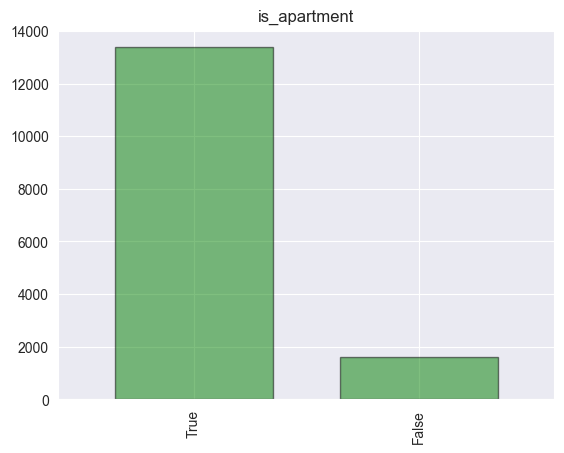

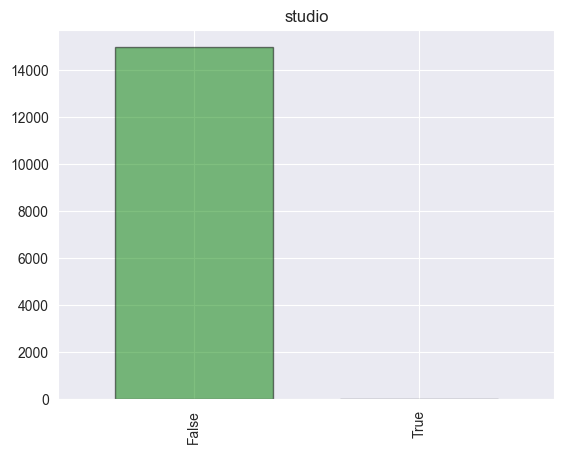

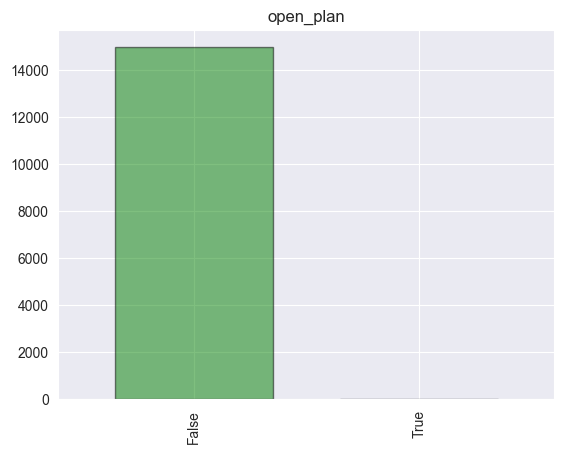

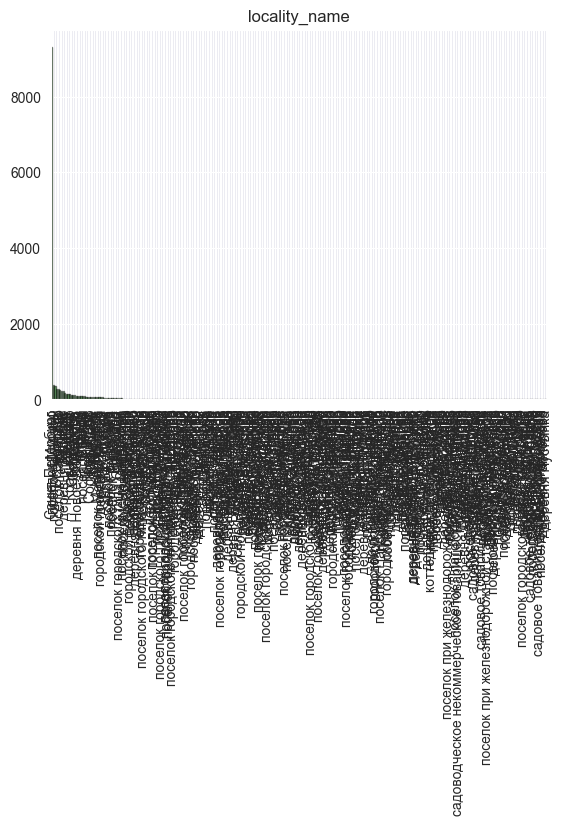

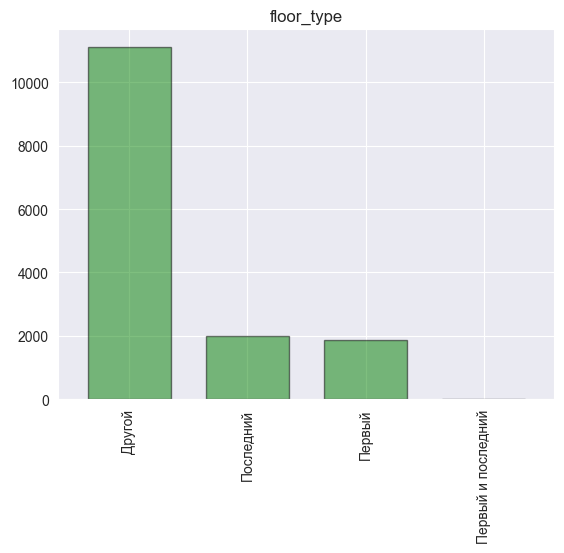

In [125]:
bar_plot(df, cat_features)

Распредение категориаьных призанков вопросов не вызывает

### 3.2 Корреляционный анализ

воспользуемся фик-корреляцией, чтобы оценить взаимсосвязь различныхь признаков.

C:\Users\guppi\PycharmProjects\mds24\.venv\Lib\site-packages\phik\data_quality.py:59: UserWarning: The number of unique values of variable first_day_exposition is large: 1125. Are you sure this is not an interval variable? Analysis for pairs of variables including first_day_exposition can be slow.
  warnings.warn(


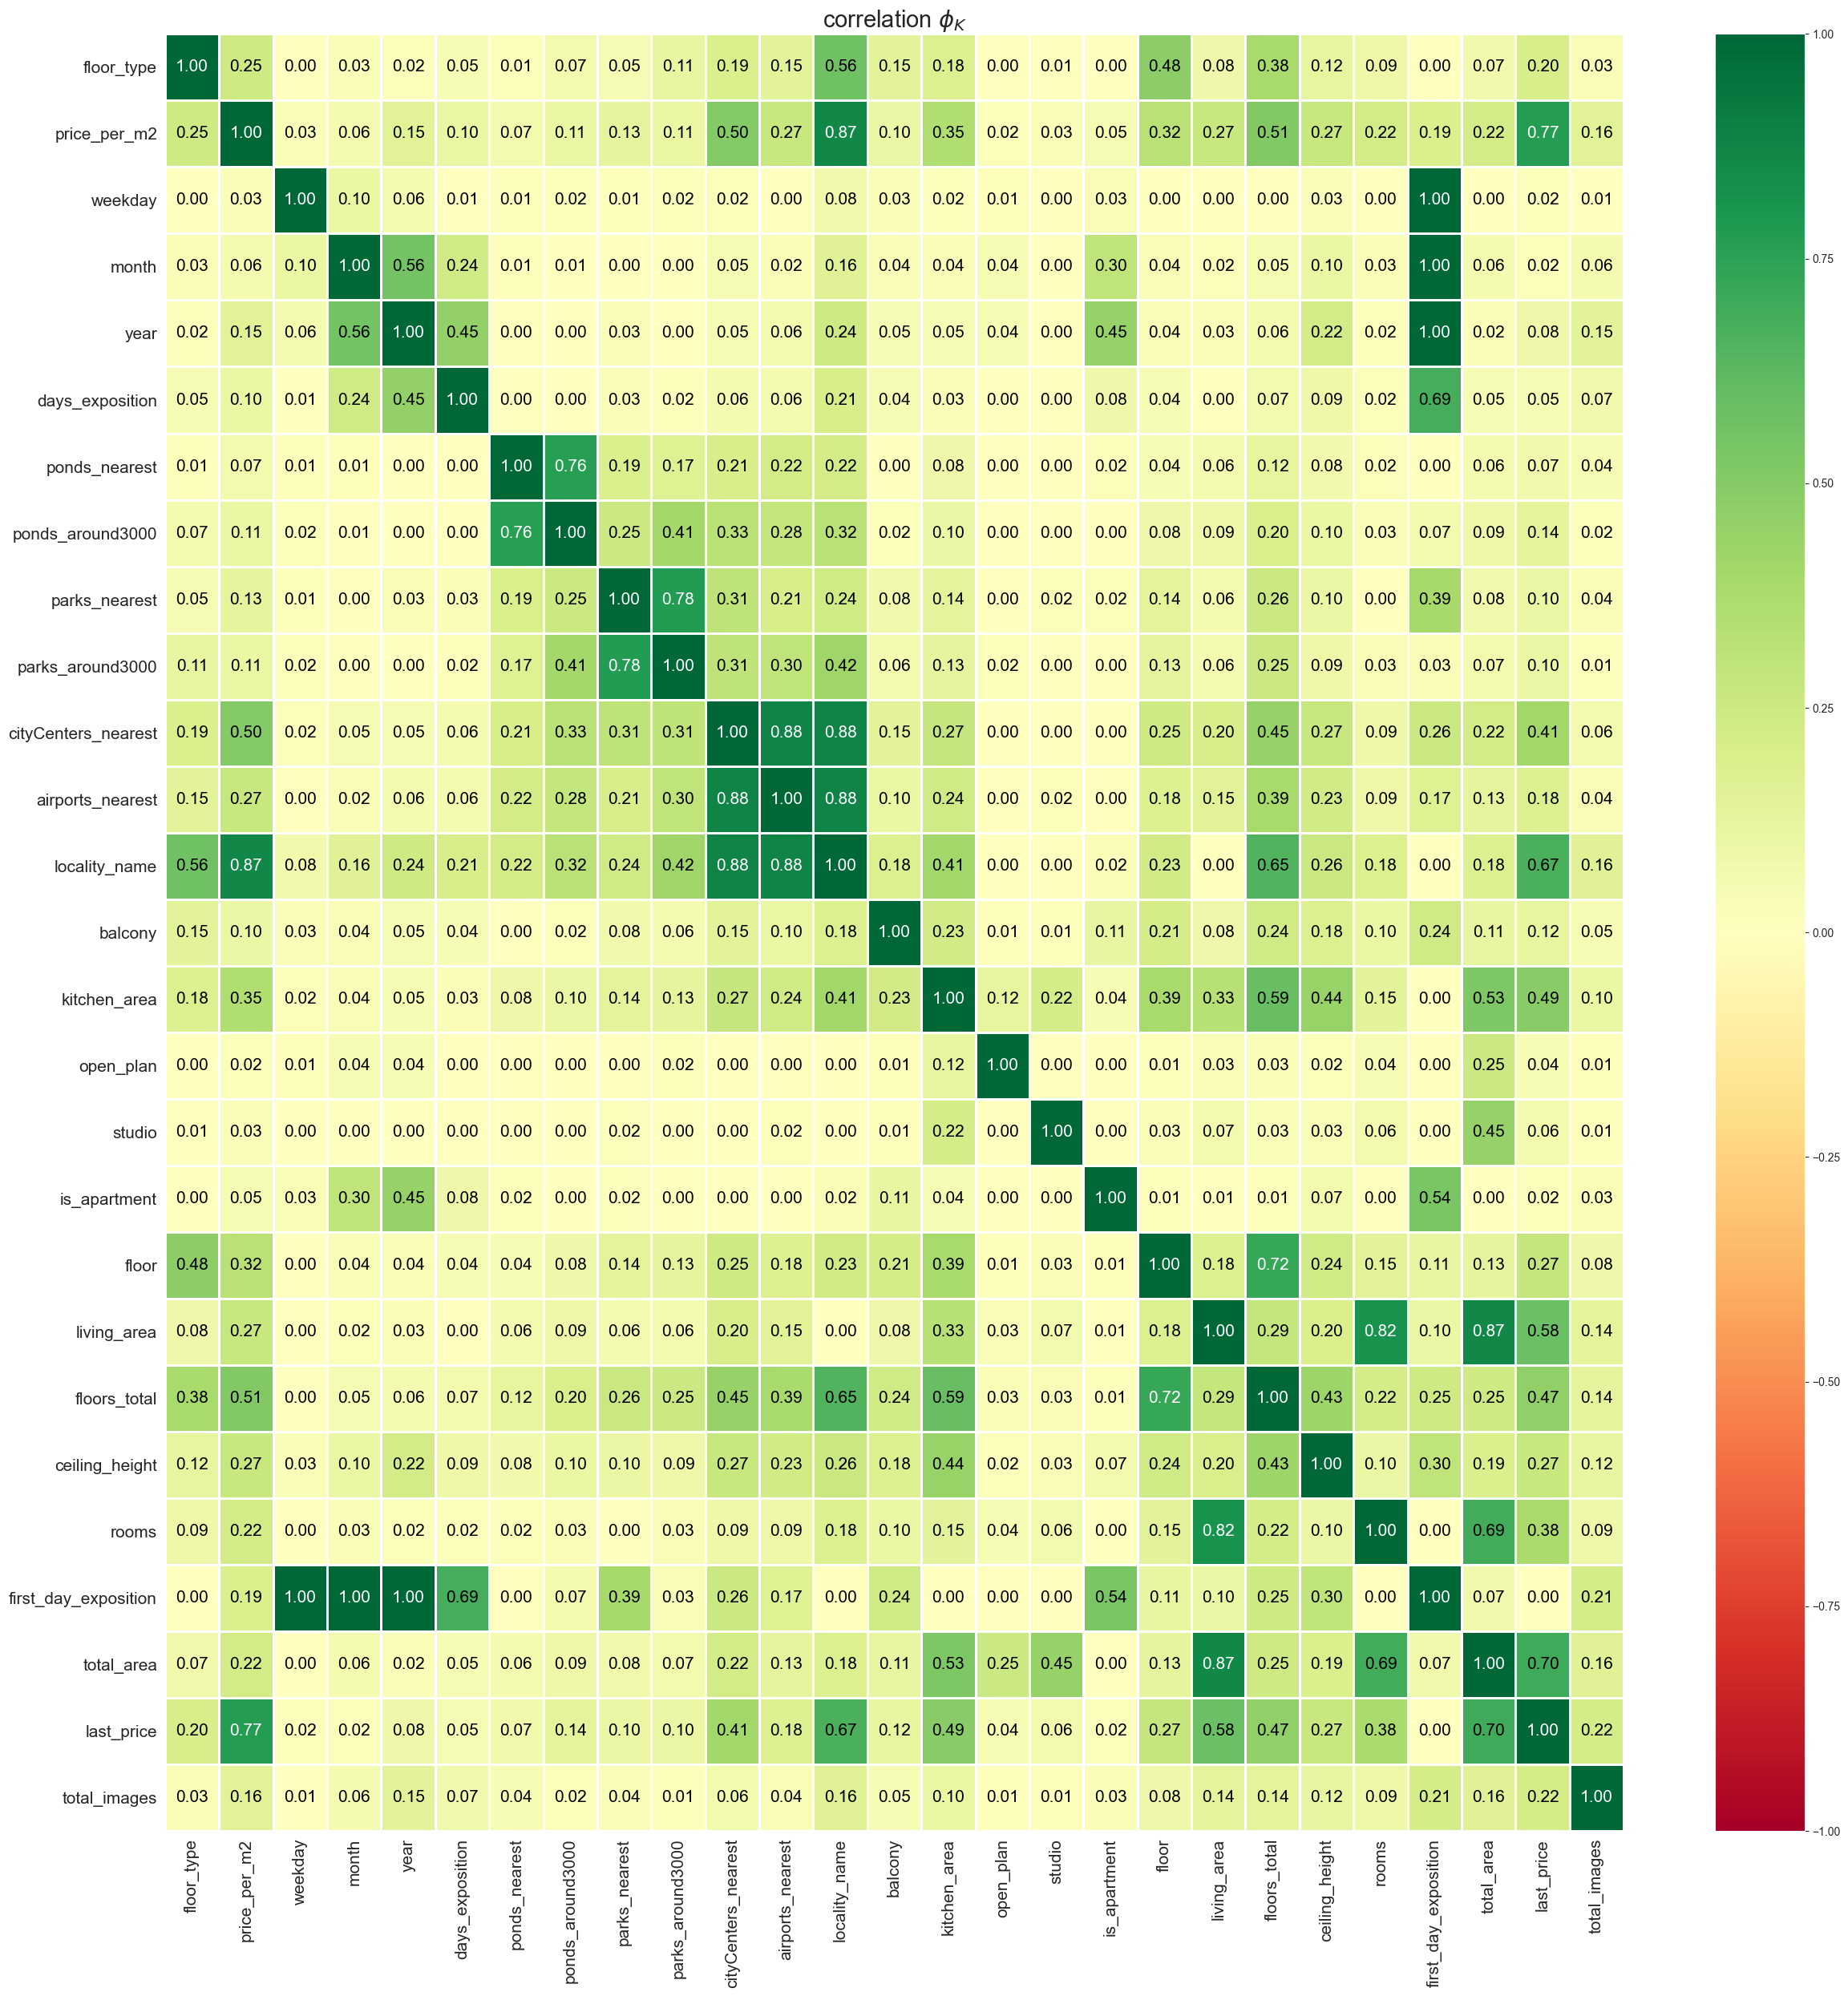

In [126]:
# Построение фик-корреляции, учитывающей различные признаки: как количественные, так и категориальные
interval_cols = num_features


phik_overview = df.phik_matrix(interval_cols=interval_cols)


plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    title=r"correlation $\phi_K$",
    fontsize_factor=1.5,
    figsize=(25, 25),
    
)

Изучим корреляцию цены на момент снятия объявленияс разными признаками:
1. Умеренно -высокая корреляция с общей площадью - 0.7
2. Умеренно-высокая корреляция в зависосмочти от  населенного пункта, где продается объект 0.67
3. Умеренная корреляция с жилой площадью 0,58
4. Средняя корреляция с общем количеством этажей 0.47, площадью кужни - 0.49, близостью центар - 0.41
5. Все остальные признаки имеет незначительную корреляция, но в целях настоящего исследования мы дополнительно изучим следующие моменты: высота потолков, количестов комна, тип этажа. 


### 3.3 Изучение влияния отдельных признаков на цену объекта

Начнем с изучения влияния комбинации факторв на общую стоимость объекта недвижимсоти, для этого построим сводную таблицу

In [127]:
# Построение сводной таблицы с использование последней цены и комбинации различных признаков
pivot_mean_price = df.pivot_table(
    values='last_price',
    index=['total_area', 'living_area', 'kitchen_area', 'floors_total','floor_type','floor','ceiling_height', 'rooms', 'cityCenters_nearest'],
    aggfunc='mean'
).reset_index()

In [161]:
display(pivot_mean_price.head())

,total_area,living_area,kitchen_area,floors_total,floor_type,floor,ceiling_height,rooms,cityCenters_nearest,last_price
0,14.0,11.0,2.0,5,Первый,1,2.72,1,11122.0,1190000.0
1,15.0,11.0,10.6,9,Первый,1,2.70,1,16376.0,1550000.0
2,15.5,10.0,11.5,5,Другой,2,2.72,1,4589.0,2450000.0
3,16.0,13.0,10.8,6,Первый,1,2.72,1,2111.0,2100000.0
4,17.0,12.0,12.2,9,Первый,1,2.70,1,29846.0,1500000.0


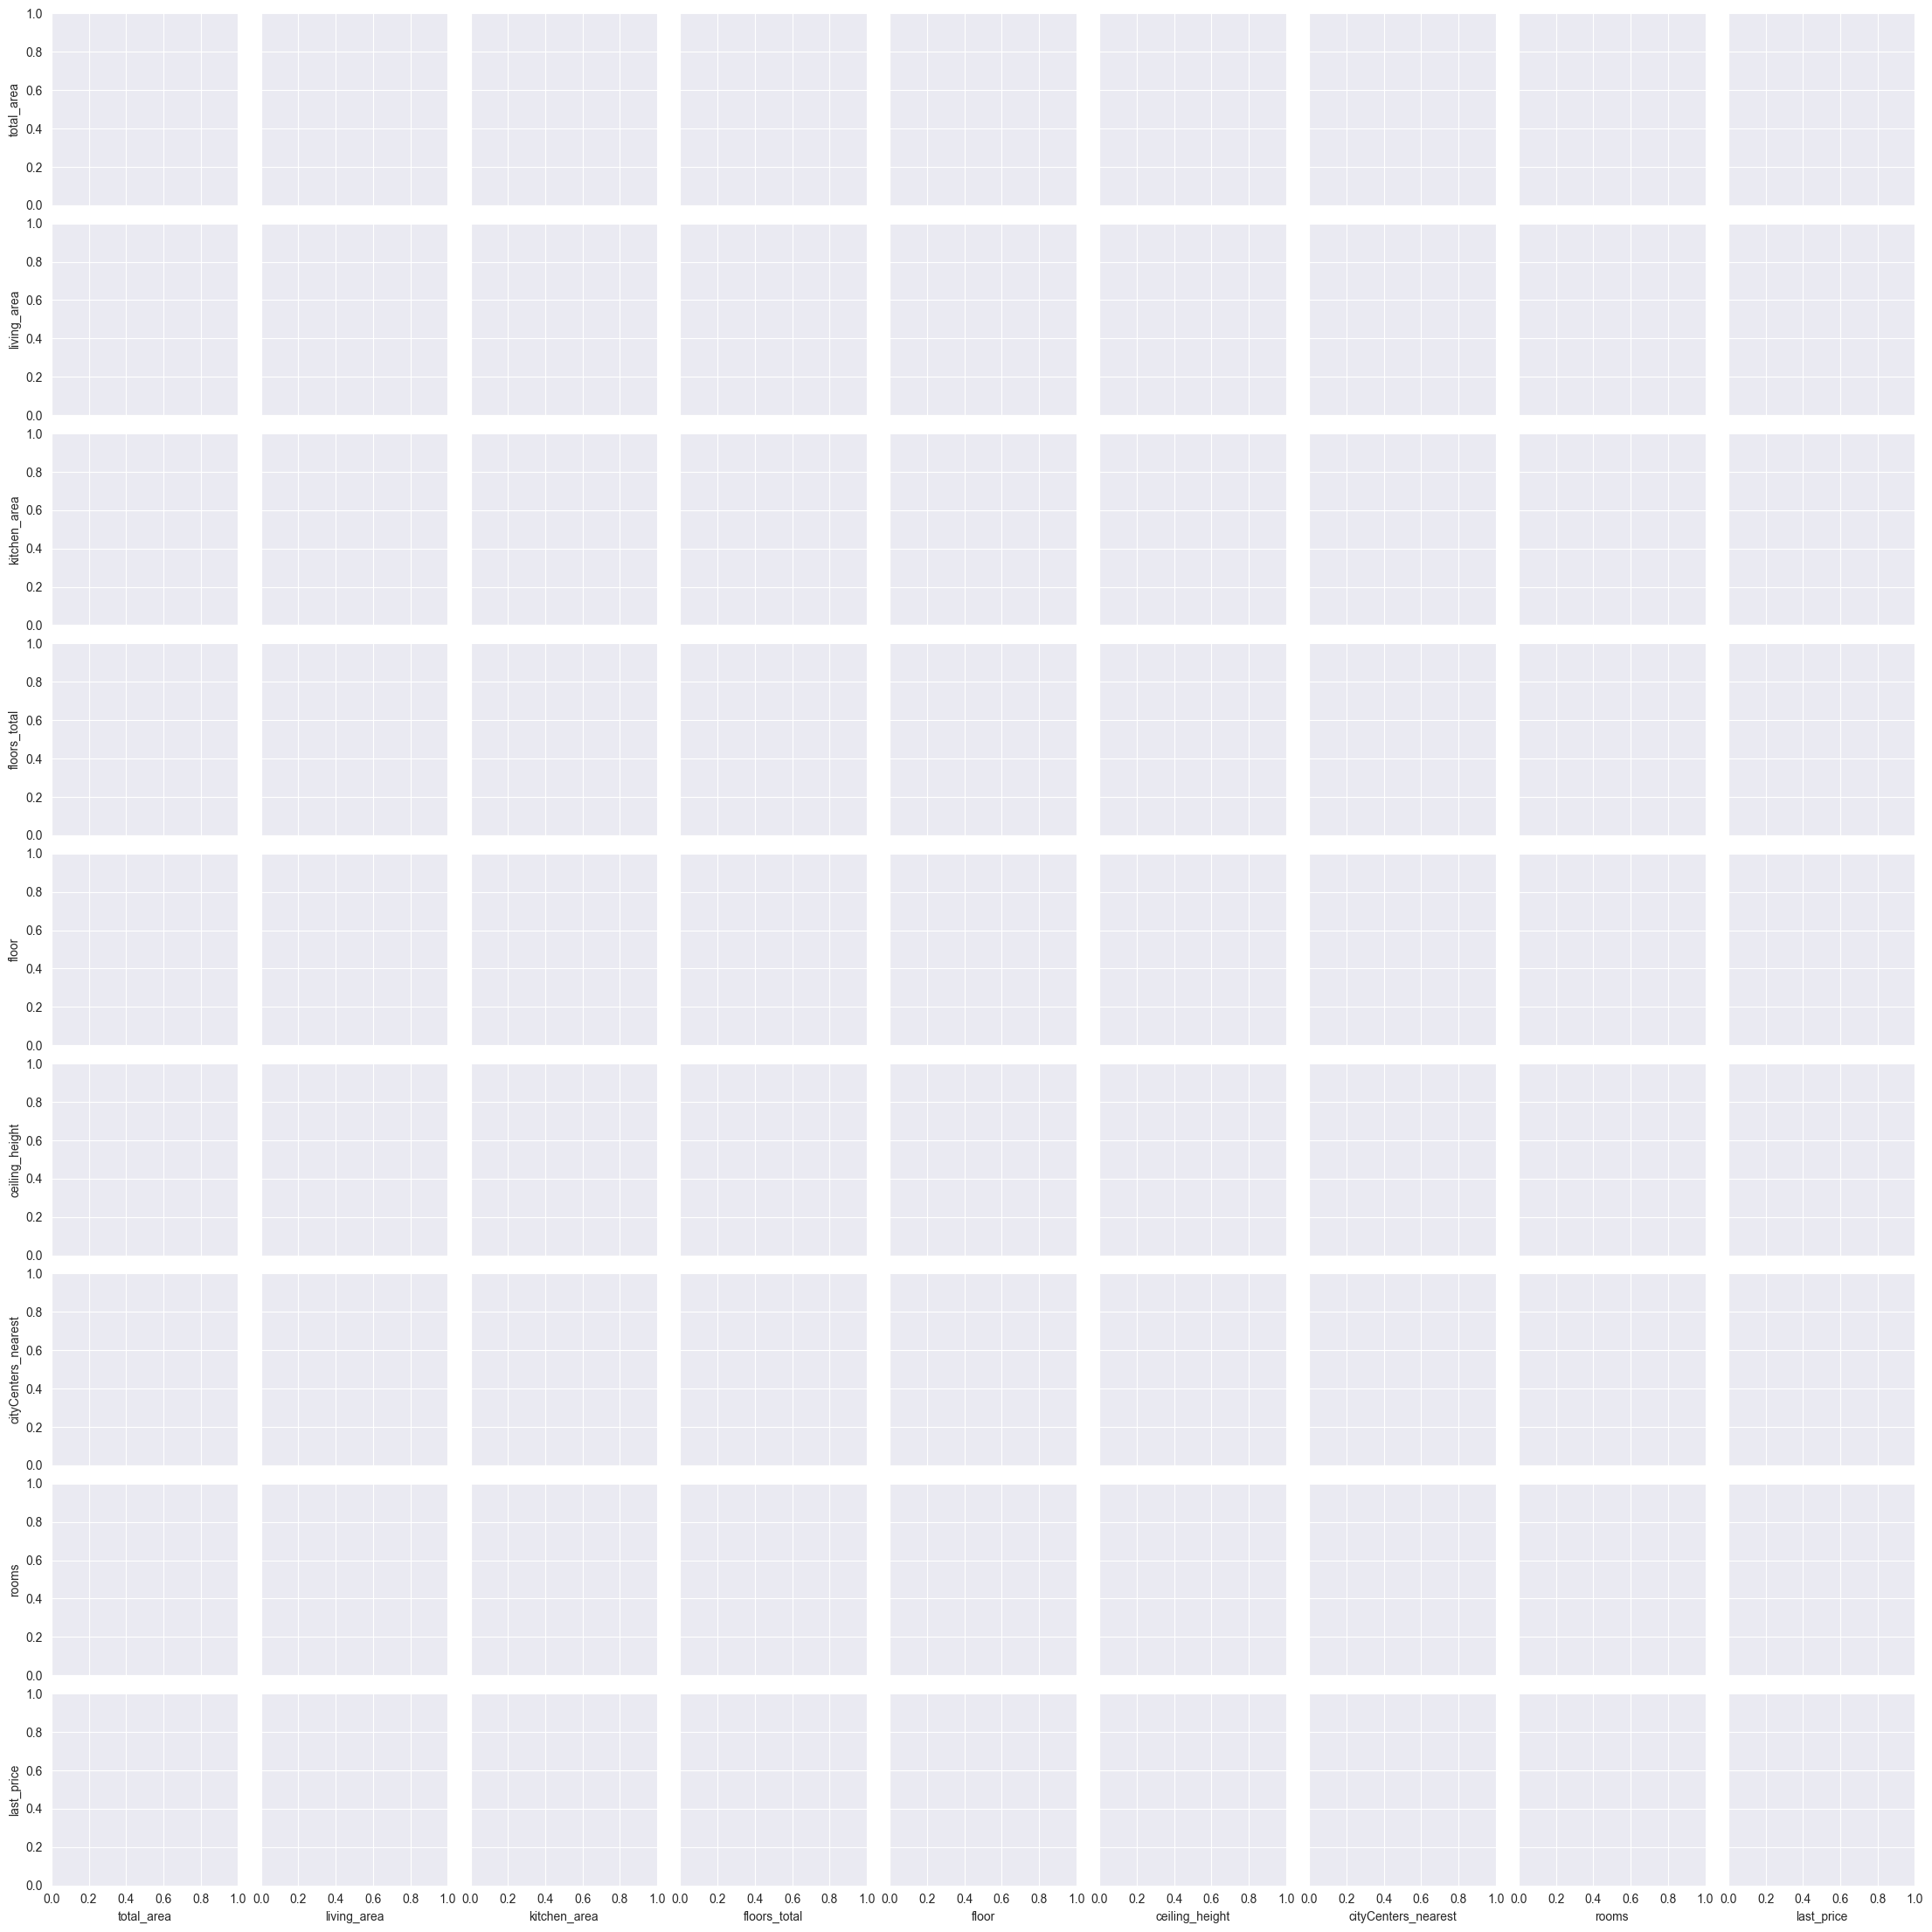

In [168]:
sns.pairplot(
    data=pivot_mean_price,
    vars=['total_area', 'living_area', 'kitchen_area', 'floors_total','floor','ceiling_height', 'cityCenters_nearest', 'rooms','last_price'],
    diag_kind='kde',
    # hue='price',
)

plt.show()

Посомория на последне парамет цены и различных факторов. В случае с площадью мы видим четскую зависисмоть, что при увеличении площади возраест и цена, также с удалением от цента цена падает, остальные зависисмости не совсем четка отражены, поэтому стоит изучить жти факторы отельно, что будет сделано ниже. 

<div class="alert alert-info">  Здесь на подумать, такое представление информации компактнее, но пивот считает ср цену в засимости от комбинации параметров, если делать с групбай. то некоторые зависисмоти намного более интересные, чем указано здесь. посему я бы оставила все таки вариант с групбаем, но там не получится сделать такую красивую агрегацию, увы. Для обсуждения

Воспользуемся метод groupby() для изуцения влияния отдельно признака на среднюю  цена объекта по этому признаку. 

In [130]:
# Функция для построения графика разброса 
def plot_general_relationship(dataframe):

    x_col, y_col = dataframe.columns

    plt.figure(figsize=(4, 4))
    plt.scatter(dataframe[x_col], dataframe[y_col], color='purple', alpha=0.5)
    
    plt.title(f' {y_col} and {x_col}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()


In [131]:
# Группировка данных по общей площади
total_area_price = df.groupby(df['total_area'].round())['last_price'].mean().reset_index()

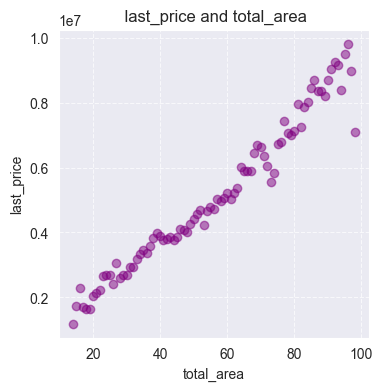

In [132]:
plot_general_relationship(total_area_price)

На графике мы можем наблюдать четкую корреляцию: что с ростом площади пастет и цена

In [133]:
living_area_price = df.groupby(df['living_area'].round())['last_price'].mean().reset_index()

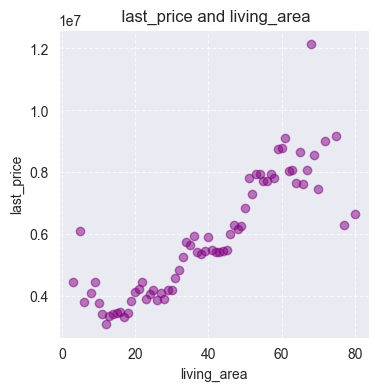

In [134]:
plot_general_relationship(living_area_price)

Здесь мы также наблюдаем рост цены при увеличение жилой площади, но линия уже не такая четкая, как в случае с общей площадью

In [135]:
floors_price = df.groupby('floors_total')['last_price'].mean().reset_index()

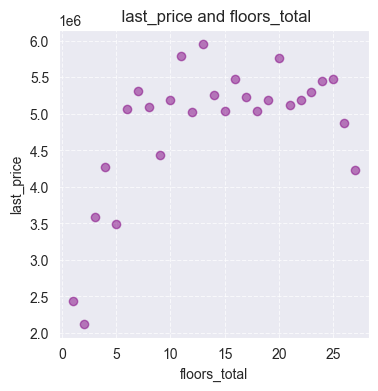

In [136]:
plot_general_relationship(floors_price)

Здесь график не показывает четкой корреляции, на высоких этаж наблюдается снижение цены средней цены. 

In [137]:
kitchen_price = df.groupby(df['kitchen_area'].round())['last_price'].mean().reset_index()

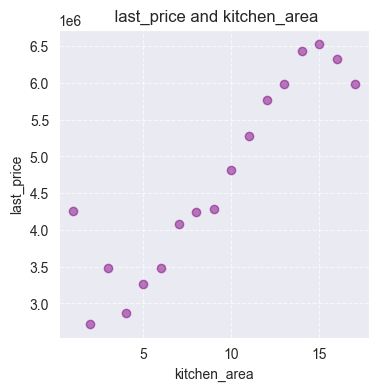

In [138]:
plot_general_relationship(kitchen_price)

Здесь наблюдаетс] линейная зависсимость цены от площади кухни с некотрыми аномалиями, например, при большой площади кухни, и при маленькой , но с более высокой ценой.

In [139]:
rooms_price = df.groupby('rooms')['last_price'].mean().reset_index()

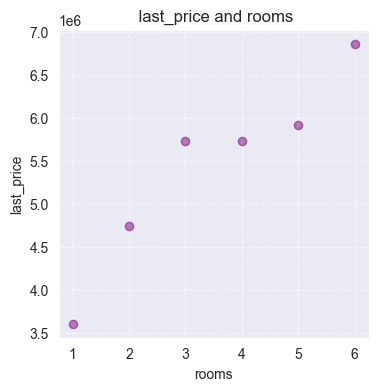

In [140]:
plot_general_relationship(rooms_price)

Здесь есть интересный момент: цена при наличи трех или четырех комнат примерно одинакова, и даже пятикомнатные квартиры не так значительно отличается от четырех и рехкомнатной квартиры. 

In [141]:
сenter_price = df.groupby(df['cityCenters_nearest'].round())['last_price'].mean().reset_index()

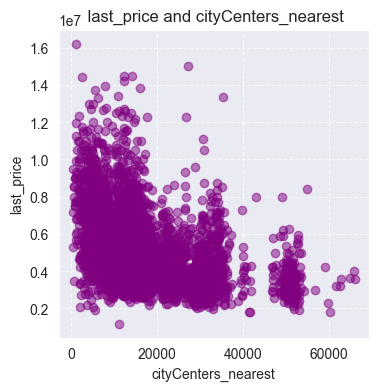

In [142]:
plot_general_relationship(сenter_price)

Здесь прекрасно иллюстрируется что при отдалении от центта стоимость объекта начинается сильно снижаться. 

In [143]:
сeiling_price = df.groupby('ceiling_height')['last_price'].mean().reset_index()

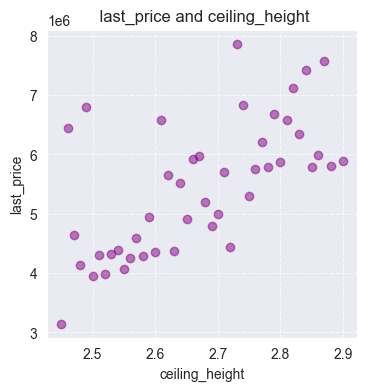

In [144]:
plot_general_relationship(сeiling_price)

Здесь прослеживается определенная закономерность между высотой потолка и ценой, не во всех случаях, но она есть. То есть объекты с высоким потолком в целом стоят дороже

In [145]:
floor_price = df.groupby('floor')['last_price'].mean().reset_index()

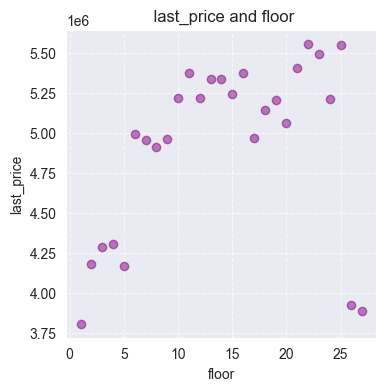

In [146]:
plot_general_relationship(floor_price)

Здесь можно сказать, что более высокие этажи стоят дороже, если отклонения в этажах вые 25-ого, но вцелом, чем выше этаж, тем больше средняя конечная цена

In [147]:
floor_type_price = df.groupby('floor_type')['last_price'].mean().reset_index()

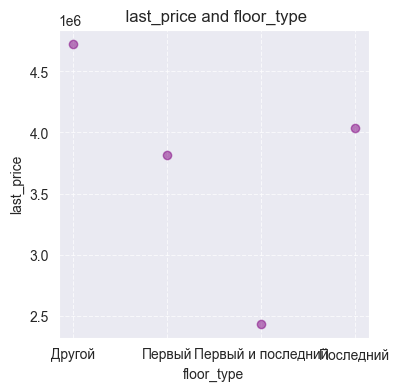

In [148]:
plot_general_relationship(floor_type_price)

<div class="alert alert-info">  здесь, видимо, что-то пошло не таки при создании нового признака. Надо будет поправить, но в целом тенденция понятна

Здесь мы видим, что квартиры на первом этаже значительно дешевле, чем на последнем, а на последнем дешевле, чем на любом другом этаже

### 3.4 Изучение цены квадратного метра в 10 населенных пунктах с наибольшим количеством объявлений. 

Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений — построим сводную таблицу с количеством объявлений и средней ценой квадратного метра для этих населенных пунктов. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [149]:
# Получаем 10 наиболее популярных локаций
top_settlements = df['locality_name'].value_counts().head(10).index

In [150]:
print(top_settlements)

Index(['Санкт-Петербург', 'поселок Мурино', 'поселок Шушары', 'Всеволожск',
       'Колпино', 'поселок Парголово', 'Гатчина', 'Пушкин', 'деревня Кудрово',
       'Петергоф'],
      dtype='object', name='locality_name')


In [151]:
# Оставляем только елементы нашего топ-10
top_df = df[df['locality_name'].isin(top_settlements)]

In [152]:
top_df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,year,month,weekday,price_per_m2,floor_type
1,7,3350000.0,40.40,2018-12-04,1,2.72,11,18.60,1,True,False,False,11.00,2,поселок Шушары,12817.0,18603.0,0.0,3100.0,0.0,3100.0,81,2018,12,1,82920.79,Первый
6,6,3700000.0,37.30,2017-11-02,1,2.72,26,10.60,6,True,False,False,14.40,1,поселок Парголово,52996.0,19143.0,0.0,3100.0,0.0,3100.0,155,2017,11,3,99195.71,Другой
8,20,2900000.0,33.16,2018-05-23,1,2.72,27,15.43,26,True,False,False,8.81,0,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189,2018,5,2,87454.76,Другой
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,True,False,False,6.50,2,Санкт-Петербург,50898.0,15008.0,0.0,3100.0,0.0,3100.0,289,2017,2,6,88524.59,Другой
10,5,5050000.0,39.60,2017-11-16,1,2.67,12,20.30,3,True,False,False,8.50,0,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137,2017,11,3,127525.25,Другой


In [153]:
# Строим сводную таблицу
price_locality = top_df.groupby('locality_name')['price_per_m2'].mean()

In [154]:
# Сортируем данные в порядке убывания
price_locality_sorted = price_locality.sort_values(ascending=False)

In [155]:
price_locality_sorted

locality_name
Санкт-Петербург      104150.277996
Пушкин                99809.003860
деревня Кудрово       93388.923690
поселок Парголово     91042.118852
поселок Мурино        86279.298634
Петергоф              82699.444867
поселок Шушары        79022.760657
Колпино               75176.631794
Гатчина               68710.703450
Всеволожск            67010.434532
Name: price_per_m2, dtype: float64

Вывод: Самая высокая цена квадратного метра в Санкт-Петербурге 104 тыс рублей, далее по стоимсоти идет Пушкин и деревня Кудрово со стоимостью почти 100 тыс рублей и 93 соотвественно. Наименьшая стоимость из топ-10 наблюдается во Всеволожске, там стоимость средняя квадратного метра жилья составляет 67000 тыс рублей за метр квадратный. 

### 3.5 Изучение стоимости объекта недвижности при различной удаленност от центра

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14972 entries, 1 to 23698
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          14972 non-null  int64         
 1   last_price            14972 non-null  float64       
 2   total_area            14972 non-null  float64       
 3   first_day_exposition  14972 non-null  datetime64[ns]
 4   rooms                 14972 non-null  int64         
 5   ceiling_height        14972 non-null  float64       
 6   floors_total          14972 non-null  int64         
 7   living_area           14696 non-null  float64       
 8   floor                 14972 non-null  int64         
 9   is_apartment          14972 non-null  bool          
 10  studio                14972 non-null  bool          
 11  open_plan             14972 non-null  bool          
 12  kitchen_area          14972 non-null  float64       
 13  balcony              

Для проведения исследования возьмем квартиры в Санкт-Петербурге  и вычислим  среднюю стоимость квдартного метра на разном удалении от центра. Учтем каждый километр расстояния, определим  среднюю стоимость квадратного метра в одном километре от центра, в двух и так далее.  Построим график изменения средней цены для каждого километра от центра Петербурга.

In [157]:
spb_apartments = df[df['locality_name'] == 'Санкт-Петербург']

In [158]:
center_distance = spb_apartments.groupby((spb_apartments['cityCenters_nearest'] / 1000).round())['price_per_m2'].mean()

In [159]:
center_distance.head(15)

cityCenters_nearest
0.0      99081.635000
1.0     120677.806667
2.0     116090.606000
3.0     111784.301333
4.0     117373.103567
5.0     120805.514856
6.0     119280.830402
7.0     118798.930943
8.0     113797.715440
9.0     106178.366720
10.0    106190.171130
11.0    103898.246634
12.0    105572.278158
13.0    105902.966527
14.0    103037.480344
Name: price_per_m2, dtype: float64

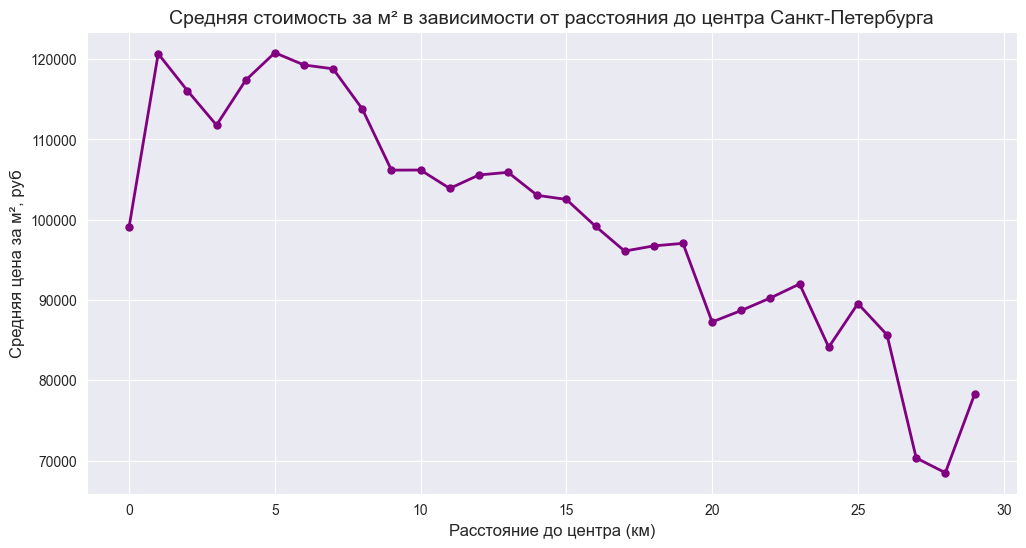

In [160]:
# Построим график для отражения жанной зависимости
plt.figure(figsize=(12, 6))
plt.plot(center_distance.index, center_distance.values, marker='o', linestyle='-', color='purple', linewidth=2, markersize=5)
plt.title('Средняя стоимость за м² в зависимости от расстояния до центра Санкт-Петербурга', fontsize=14)
plt.xlabel('Расстояние до центра (км)', fontsize=12)
plt.ylabel('Средняя цена за м², руб', fontsize=12)
plt.show()

<div class="alert alert-info">  Думаю, где то данные все-таки недочищены

Итак, по графику мы можем сказать следующее: Есть аномальное снижение цены на расстояние около ноля от цента, скорее всего здесь есть проблема в исходных данных. В остальном мы наблюдаем, что чем ближе к центру, тем квадратный метр дороже. Есть также понижение на растояние примерно 3 км от цента. Далее цена снижается в зависимости от удаленности. Однако есть также необычный всплеск около 30 км, где цена неожиданно возрастает с 70-ти до 80 тыс. В целом вывод

Общий вывод по разделу:  
1. Были проанализированы и подробно описаны статистические метрики по имеющимся у нас данным.
2. Была построена матрица корреляции где были выявлены параметры, в наибольшей стпени вляиющие на конечную цену объекта недвижимости. Этими парметрами были: удаленность от цента, наседеный пункт, общая площадь и др.
3. На основании корреляционного анализа были отобраны определенные фичи для более детального изучения зависисмоти между конечной ценой и фичей, данные были сгруппированы по фиче, рассчитана средняя цена. далее были построены графики и сделаны соответсвующие заключения. Например, мы действительно подтвердили линейную зависимость стоимости от общей и жилой площади. Подверждена зависимость от площади кухни, высоты потолка, типа этажа(первый, последний или другой) 
4. БЬыли дополнительно изучены параметры цены за квадратный метр топ-10 объектов по количеству объявлений. Самая высокая цена квадратного метра в Санкт-Петербурге 104 тыс рублей, далее по стоимсоти идет Пушкин и деревня Кудрово со стоимостью почти 100 тыс рублей и 93 соотвественно. Наименьшая стоимость из топ-10 наблюдается во Всеволожске, там стоимость средняя квадратного метра жилья составляет 67000 тыс рублей за метр квадратный. 
5. Была проанализирована цена за квадратный метр и ее зависисмость при отделении от центр.  Чем ближе к центру, тем квадратный метр дороже.

# 4. Fair price and some visualisations

In [178]:
df.columns.to_list()

['total_images',
 'last_price',
 'total_area',
 'first_day_exposition',
 'rooms',
 'ceiling_height',
 'floors_total',
 'living_area',
 'floor',
 'is_apartment',
 'studio',
 'open_plan',
 'kitchen_area',
 'balcony',
 'locality_name',
 'airports_nearest',
 'cityCenters_nearest',
 'parks_around3000',
 'parks_nearest',
 'ponds_around3000',
 'ponds_nearest',
 'days_exposition',
 'year',
 'month',
 'weekday',
 'price_per_m2',
 'floor_type']

In [188]:
df_fair_price = df.copy(deep=True)
# df_fair_price = df_fair_price.groupby(COLUMNS_TO_CHECK)['price_per_m2'].mean().reset_index()


def create_bins(series, bins, labels):
    return pd.cut(series, bins=bins, labels=labels, include_lowest=True)


city_center_bins = [0, 5000, 10000, 20000, 50000]
floor_bins = [0, 5, 10, 20, 50]
living_area_bins = [0, 30, 60, 90, 200]

df_fair_price['cityCenters_range'] = create_bins(df_fair_price['cityCenters_nearest'], city_center_bins, labels=['0-5km', '5-10km', '10-20km', '20-50km'])
df_fair_price['floor_range']       = create_bins(df_fair_price['floor'],               floor_bins,       labels=['1-5', '6-10', '11-20', '21+'])
df_fair_price['living_area_range'] = create_bins(df_fair_price['living_area'],         living_area_bins, labels=['0-30', '31-60', '61-90', '91+'])


# COLUMNS_TO_CHECK = [
#     'locality_name',
#     'ceiling_height',
#     'floors_total',
#     'parks_around3000',
#     'ponds_around3000',
#     'cityCenters_range',  # Новый диапазон
#     'floor_range',        # Новый диапазон
#     'living_area_range'   # Новый диапазон
# ]
#
# df_fair_price = df.dropna(subset=COLUMNS_TO_CHECK + ['price_per_m2'])
#
#
# df_fair_price = df_fair_price.groupby(COLUMNS_TO_CHECK)['price_per_m2'].mean().reset_index()
# df_fair_price
df_fair_price

# df['fair_price'] = df['total_area'] * df['locality_name'].map(locality_price_per_m2)



,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,year,month,weekday,price_per_m2,floor_type,cityCenters_range,floor_range,living_area_range
1,7,3350000.0,40.40,2018-12-04,1,2.72,11,18.60,1,True,False,False,11.00,2,поселок Шушары,12817.0,18603.0,0.0,3100.0,0.0,3100.0,81,2018,12,1,82920.79,Первый,10-20km,1-5,0-30
5,10,2890000.0,30.40,2018-09-10,1,2.72,12,14.40,5,True,False,False,9.10,0,городской поселок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55,2018,9,0,95065.79,Другой,NaN,1-5,0-30
6,6,3700000.0,37.30,2017-11-02,1,2.72,26,10.60,6,True,False,False,14.40,1,поселок Парголово,52996.0,19143.0,0.0,3100.0,0.0,3100.0,155,2017,11,3,99195.71,Другой,10-20km,6-10,0-30
8,20,2900000.0,33.16,2018-05-23,1,2.72,27,15.43,26,True,False,False,8.81,0,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189,2018,5,2,87454.76,Другой,NaN,21+,0-30
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,True,False,False,6.50,2,Санкт-Петербург,50898.0,15008.0,0.0,3100.0,0.0,3100.0,289,2017,2,6,88524.59,Другой,10-20km,6-10,31-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23690,3,5500000.0,52.00,2018-07-19,2,2.72,5,31.00,2,True,False,False,6.00,0,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,3100.0,15,2018,7,3,105769.23,Другой,5-10km,1-5,31-60
23692,2,1350000.0,30.00,2017-07-07,1,2.72,5,17.50,4,True,False,False,6.00,0,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413,2017,7,4,45000.00,Другой,NaN,1-5,0-30
23693,9,4600000.0,62.40,2016-08-05,3,2.60,9,40.00,8,True,False,False,8.00,0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239,2016,8,4,73717.95,Другой,20-50km,6-10,31-60
23695,14,3100000.0,59.00,2018-01-15,3,2.72,5,38.00,4,True,False,False,8.50,0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45,2018,1,0,52542.37,Другой,NaN,1-5,31-60
